# Importing Libraries

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# import 'Seaborn' 
import seaborn as sns
import scipy.stats as stats

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder 
from imblearn.over_sampling import SMOTE

# import various functions from sklearn 
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,cohen_kappa_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import KFold

# import function to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA

import  warnings
warnings.filterwarnings("ignore")

In [2]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

# Title: Bank Marketing

### Business Problem
There has been a revenue decline for the Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing effort on such clients.

To resolve the proble, we suggest a classification approach to predict which clients are more likely to subscribe for term deposits.

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required,in order to access if the product (bank term deposit) would be (or not) subscribed.
The classification goal is to predict if the client will subscribe a term deposit (variable y).

Age group: 

10 - 19 = 1

20 - 29 = 2

30 - 39 = 3

40 - 49 = 4

50 - 59 = 5

60 - 69 = 6

70 - 79 = 7

80 - 89 = 8

90 - 99 = 9

1 - age (numeric)

2 - job : type of job (categorical:"admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services") 
 
3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
 
4 - education (categorical: "unknown","secondary","primary","tertiary")
 
5 - default: has credit in default? (binary: "yes","no")
   
6 - balance: average yearly balance, in euros (numeric)
   
7 - housing: has housing loan? (binary: "yes","no")
   
8 - loan: has personal loan? (binary: "yes","no")
   
#related with the last contact of the current campaign:
    
9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 

10 - day: last contact day of the month (numeric)
  
11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
12 - duration: last contact duration, in seconds (numeric).

Important note:  This attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
  
#other attributes:

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)
  
16 - poutcome: outcome of the previous marketing campaign (categorical:"unknown","other","failure","success")

Output variable (desired target):
  
17 - y - has the client subscribed a term deposit? (binary: "yes","no")

Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques. 

In [196]:
df = pd.read_csv('bank-marketing.csv')
df.head()

age  age group eligible           job  salary  marital  education  \
0   58          5        Y    management  100000  married   tertiary   
1   44          4        Y    technician   60000   single  secondary   
2   33          3        Y  entrepreneur  120000  married  secondary   
3   47          4        Y   blue-collar   20000  married    unknown   
4   33          3        Y       unknown       0   single    unknown   

   marital-education targeted default  balance housing loan  contact  day  \
0   married-tertiary      yes      no     2143     yes   no  unknown    5   
1   single-secondary      yes      no       29     yes   no  unknown    5   
2  married-secondary      yes      no        2     yes  yes  unknown    5   
3    married-unknown       no      no     1506     yes   no  unknown    5   
4     single-unknown       no      no        1      no   no  unknown    5   

  month  duration  campaign  pdays  previous poutcome   y  response  
0   may       261         1     -1         0  unknown  no         0  
1   may       151         1     -1         0  unknown  no         0  
2   may        76         1     -1         0  unknown  no         0  
3   may        92         1     -1         0  unknown  no         0  
4   may       198         1     -1         0  unknown  no         0

In [4]:
df.sample(10)

age  age group eligible          job  salary  marital  education  \
35136   48          4        Y   management  100000  married  secondary   
36289   52          5        Y     services   70000  married  secondary   
23239   44          4        Y   management  100000   single   tertiary   
19538   45          4        Y  blue-collar   20000  married    primary   
41077   25          2        Y   management  100000   single   tertiary   
44416   30          3        Y    housemaid   16000   single   tertiary   
17714   47          4        Y   management  100000  married   tertiary   
33547   28          2        Y   technician   60000  married   tertiary   
11694   56          5        Y  blue-collar   20000  married  secondary   
31475   32          3        Y     services   70000   single   tertiary   

       marital-education targeted default  balance housing loan    contact  \
35136  married-secondary      yes      no     3663     yes   no  telephone   
36289  married-secondary      yes      no      540     yes   no   cellular   
23239    single-tertiary       no      no      639      no   no   cellular   
19538    married-primary      yes      no     -485     yes   no   cellular   
41077    single-tertiary       no      no      528      no   no   cellular   
44416    single-tertiary       no      no       19      no   no   cellular   
17714   married-tertiary      yes      no    24312     yes   no   cellular   
33547   married-tertiary      yes      no      161     yes   no   cellular   
11694  married-secondary      yes      no      337     yes   no    unknown   
31475    single-tertiary       no      no     1743     yes   no   cellular   

       day month  duration  campaign  pdays  previous poutcome    y  response  
35136    7   may        25         5    169         1  failure   no         0  
36289   11   may       154         2    340         2  failure   no         0  
23239   27   aug        69        12     -1         0  unknown   no         0  
19538    7   aug       122         2     -1         0  unknown   no         0  
41077   14   aug       201         1     -1         0  unknown  yes         1  
44416    4   aug       139         1     92         5  success  yes         1  
17714   29   jul       187         3     -1         0  unknown   no         0  
33547   20   apr       268         2     -1         0  unknown   no         0  
11694   20   jun        99         2     -1         0  unknown   no         0  
31475    1   apr      1156         1    261         3    other   no         0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                45211 non-null  int64 
 1   age group          45211 non-null  int64 
 2   eligible           45211 non-null  object
 3   job                45211 non-null  object
 4   salary             45211 non-null  int64 
 5   marital            45211 non-null  object
 6   education          45211 non-null  object
 7   marital-education  45211 non-null  object
 8   targeted           45211 non-null  object
 9   default            45211 non-null  object
 10  balance            45211 non-null  int64 
 11  housing            45211 non-null  object
 12  loan               45211 non-null  object
 13  contact            45211 non-null  object
 14  day                45211 non-null  int64 
 15  month              45211 non-null  object
 16  duration           45211 non-null  int64

In [197]:
df.drop('marital-education',1,inplace=True)

In [198]:
df.drop('response',1,inplace=True)

In [8]:
df.shape

(45211, 21)

In [9]:
df.isnull().sum()

age          0
age group    0
eligible     0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
df.describe()

age     age group         salary        balance           day  \
count  45211.000000  45211.000000   45211.000000   45211.000000  45211.000000   
mean      40.936210      3.645861   57006.171065    1362.272058     15.806419   
std       10.618762      1.083271   32085.718415    3044.765829      8.322476   
min       18.000000      1.000000       0.000000   -8019.000000      1.000000   
25%       33.000000      3.000000   20000.000000      72.000000      8.000000   
50%       39.000000      3.000000   60000.000000     448.000000     16.000000   
75%       48.000000      4.000000   70000.000000    1428.000000     21.000000   
max       95.000000      9.000000  120000.000000  102127.000000     31.000000   

           duration      campaign         pdays      previous  
count  45211.000000  45211.000000  45211.000000  45211.000000  
mean     258.163080      2.763841     40.197828      0.580323  
std      257.527812      3.098021    100.128746      2.303441  
min        0.000000      1.000000     -1.000000      0.000000  
25%      103.000000      1.000000     -1.000000      0.000000  
50%      180.000000      2.000000     -1.000000      0.000000  
75%      319.000000      3.000000     -1.000000      0.000000  
max     4918.000000     63.000000    871.000000    275.000000

In [11]:
df.describe(include=np.object).T

count unique          top   freq
eligible   45211      2            Y  43380
job        45211     12  blue-collar   9732
marital    45211      3      married  27214
education  45211      4    secondary  23202
targeted   45211      2          yes  37091
default    45211      2           no  44396
housing    45211      2          yes  25130
loan       45211      2           no  37967
contact    45211      3     cellular  29285
month      45211     12          may  13766
poutcome   45211      4      unknown  36959
y          45211      2           no  39922

In [12]:
for i in df.select_dtypes(include=np.object).columns:
    print(df[i].value_counts())
    print()

Y    43380
N     1831
Name: eligible, dtype: int64

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

yes    37091
no      8120
Name: targeted, dtype: int64

no     44396
yes      815
Name: default, dtype: int64

yes    25130
no     20081
Name: housing, dtype: int64

no     37967
yes     7244
Name: loan, dtype: int64

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon

In [13]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [14]:
df['y'].value_counts(normalize=True)*100

no     88.30152
yes    11.69848
Name: y, dtype: float64

In [15]:
df.head()

age  age group eligible           job  salary  marital  education targeted  \
0   58          5        Y    management  100000  married   tertiary      yes   
1   44          4        Y    technician   60000   single  secondary      yes   
2   33          3        Y  entrepreneur  120000  married  secondary      yes   
3   47          4        Y   blue-collar   20000  married    unknown       no   
4   33          3        Y       unknown       0   single    unknown       no   

  default  balance housing loan  contact  day month  duration  campaign  \
0      no     2143     yes   no  unknown    5   may       261         1   
1      no       29     yes   no  unknown    5   may       151         1   
2      no        2     yes  yes  unknown    5   may        76         1   
3      no     1506     yes   no  unknown    5   may        92         1   
4      no        1      no   no  unknown    5   may       198         1   

   pdays  previous poutcome   y  
0     -1         0  unknown  no  
1     -1         0  unknown  no  
2     -1         0  unknown  no  
3     -1         0  unknown  no  
4     -1         0  unknown  no

In [7]:
num_col = ['age','salary','balance','day','duration','campaign','pdays','previous']
cat_col = ['age group', 'eligible', 'job', 'marital', 'education','targeted', 'default', 'housing',
           'loan', 'contact', 'month', 'poutcome']

In [17]:
len(num_col),len(cat_col)

(8, 12)

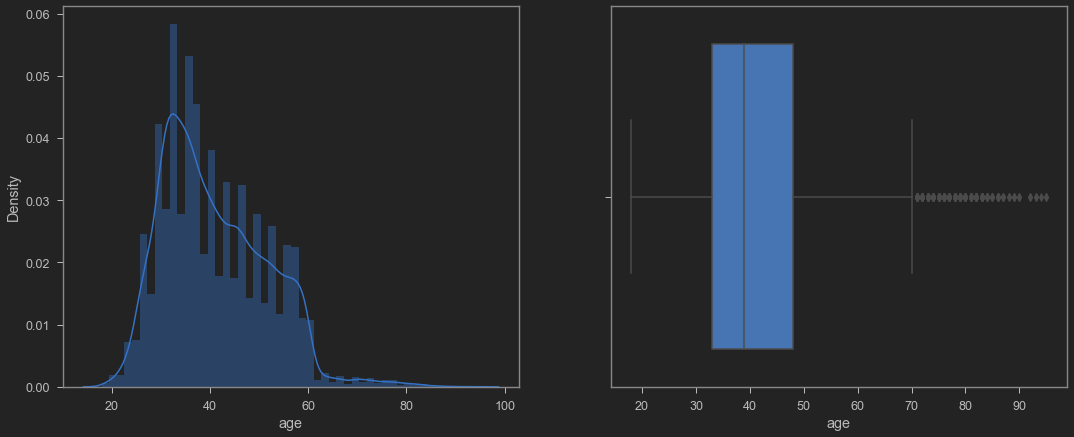

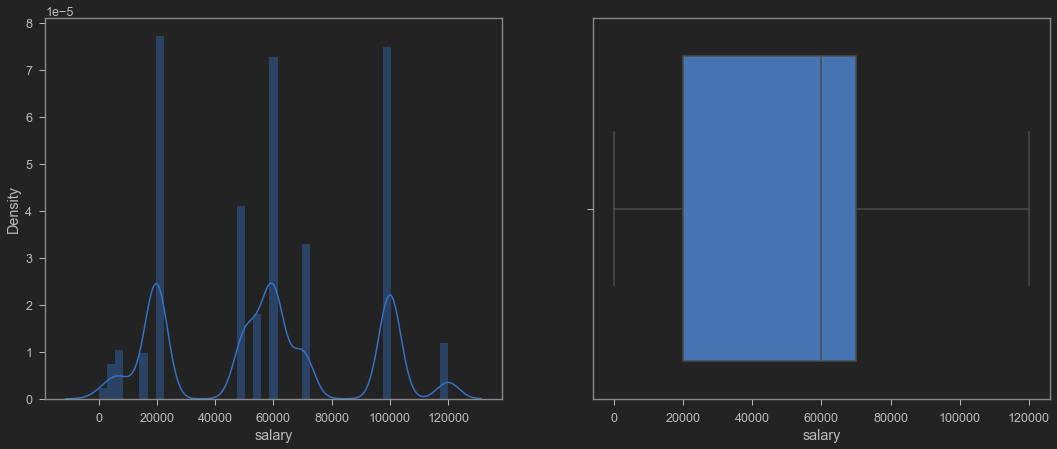

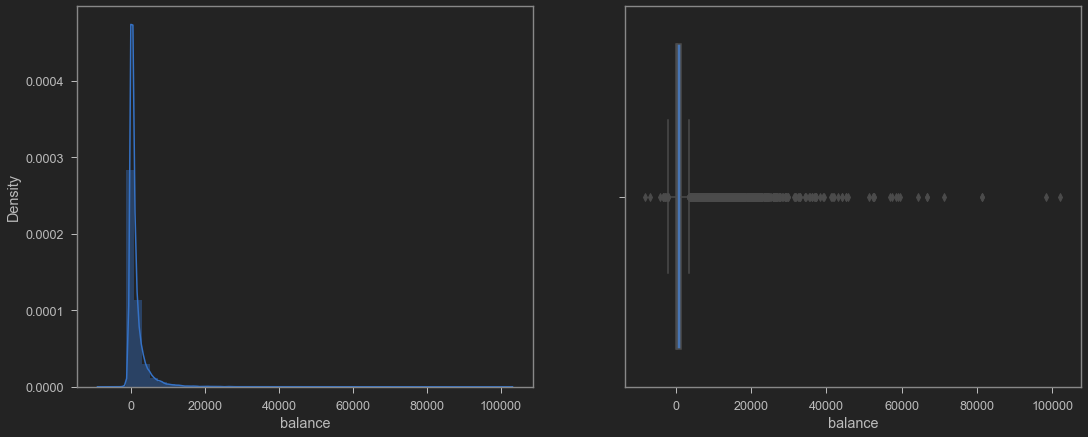

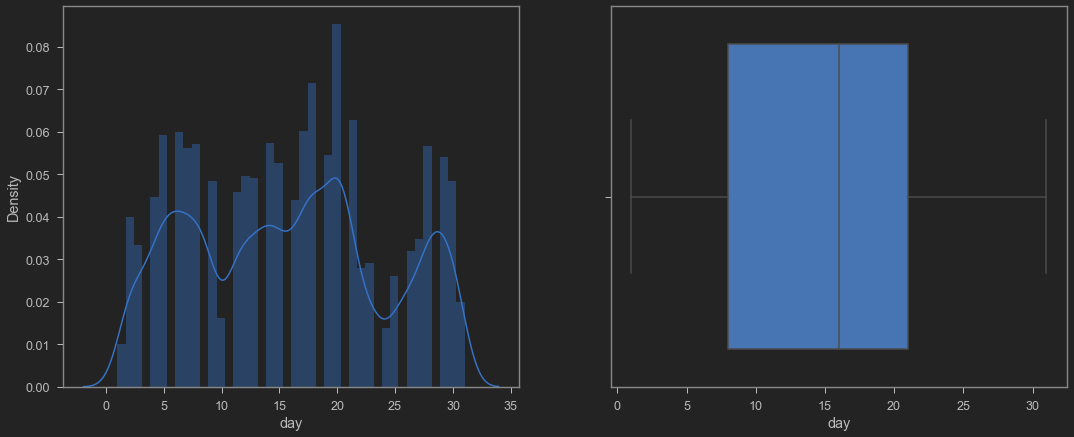

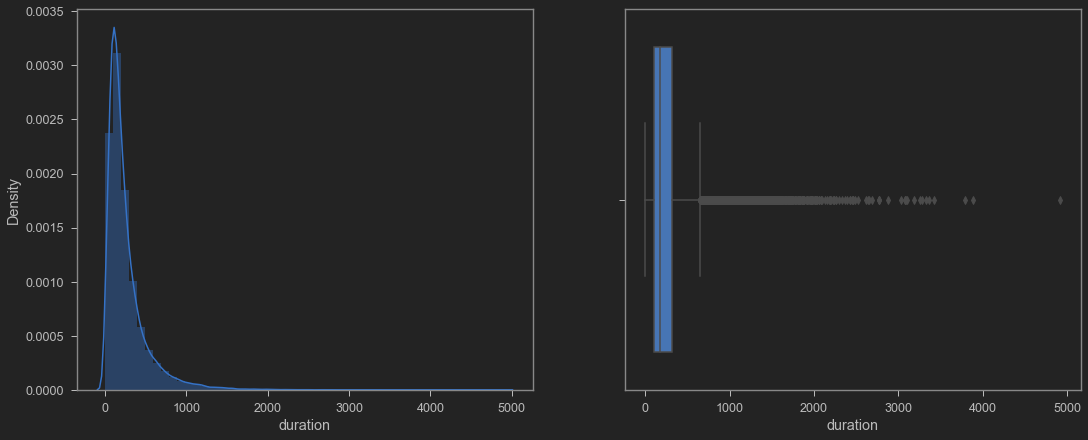

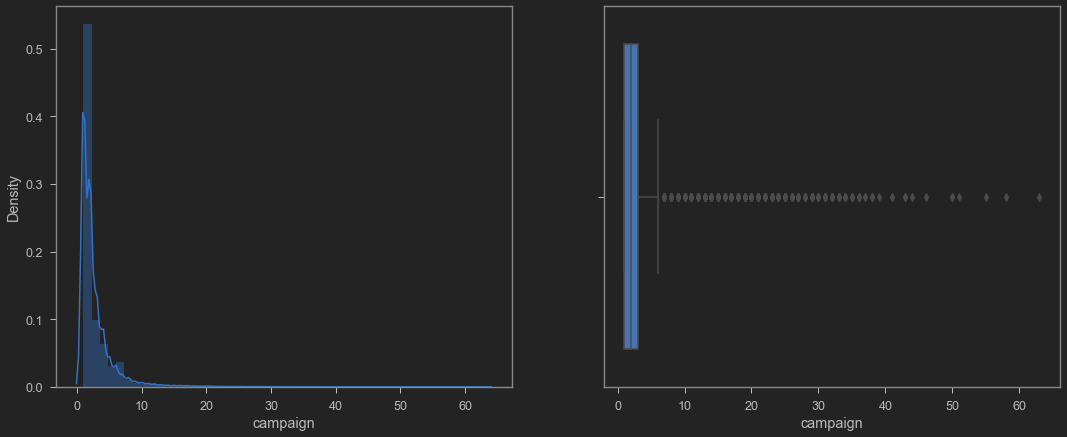

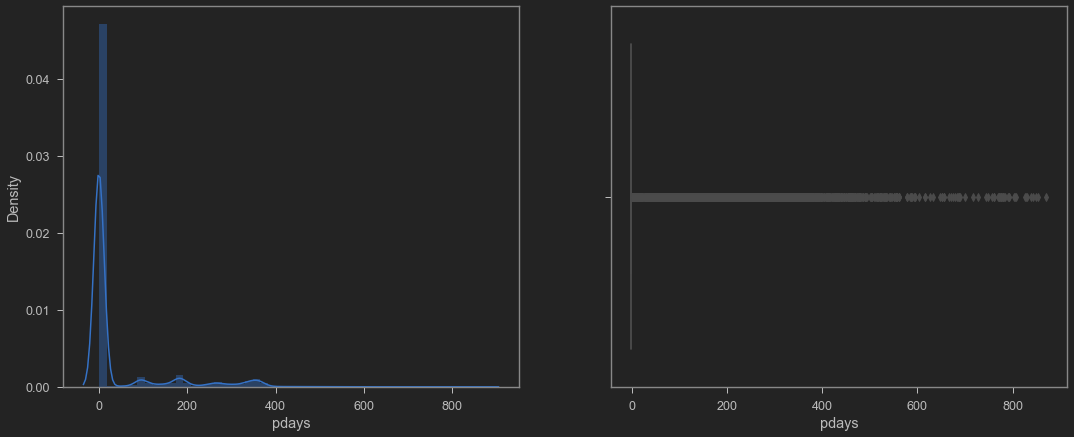

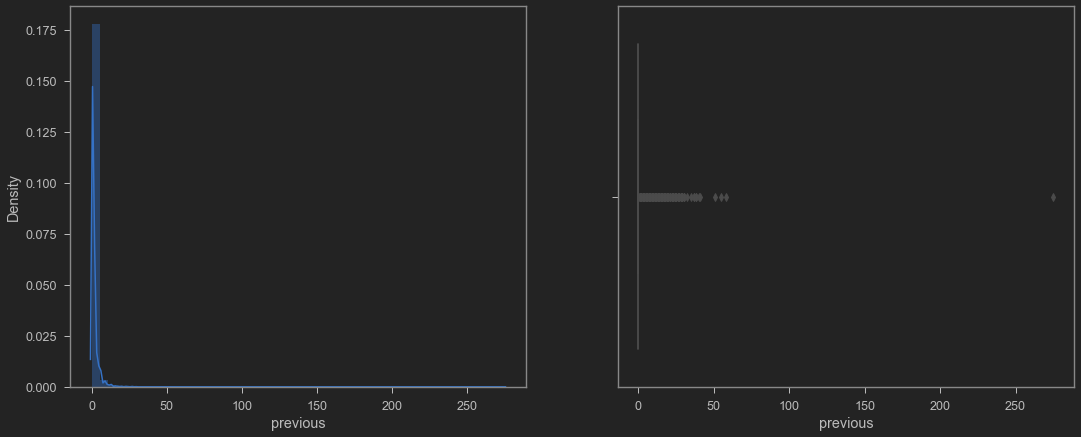

In [18]:
for i in num_col:
    plt.figure(figsize=(18,7))
    plt.subplot(1,2,1)
    sns.distplot(df[i])
    plt.subplot(1,2,2)
    sns.boxplot(df[i])
    plt.show()

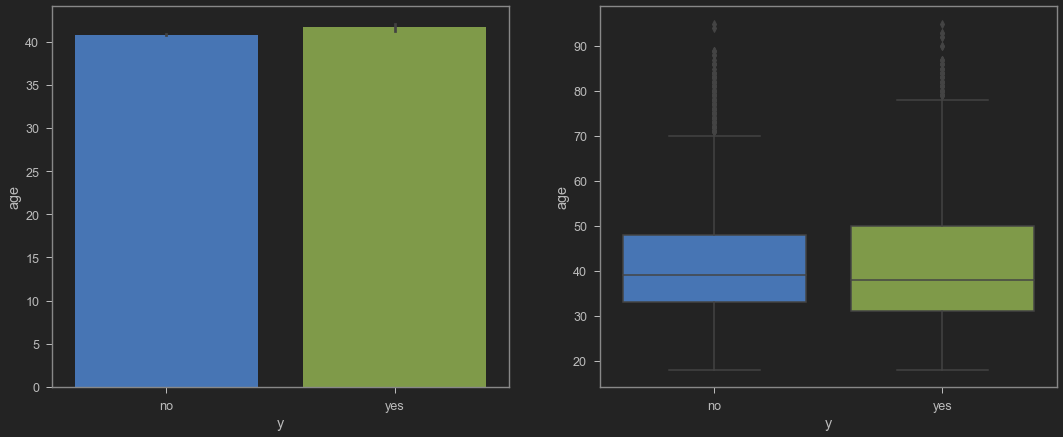

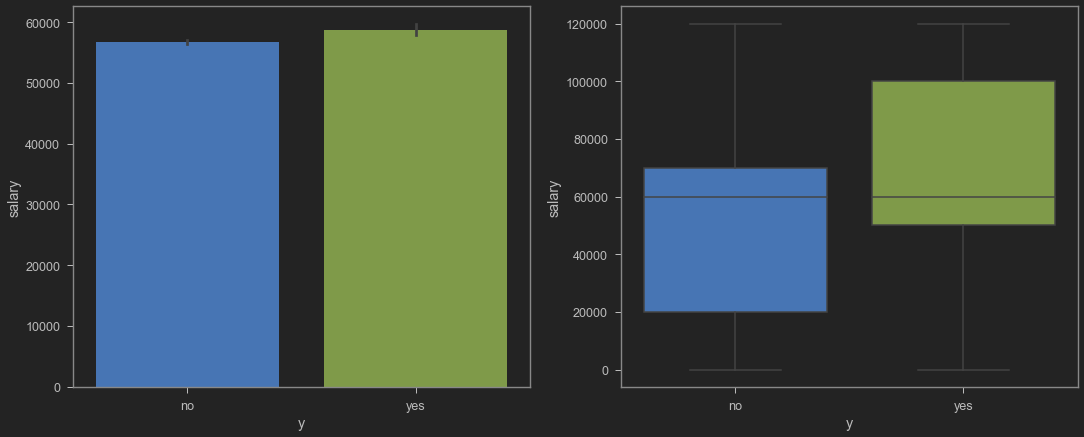

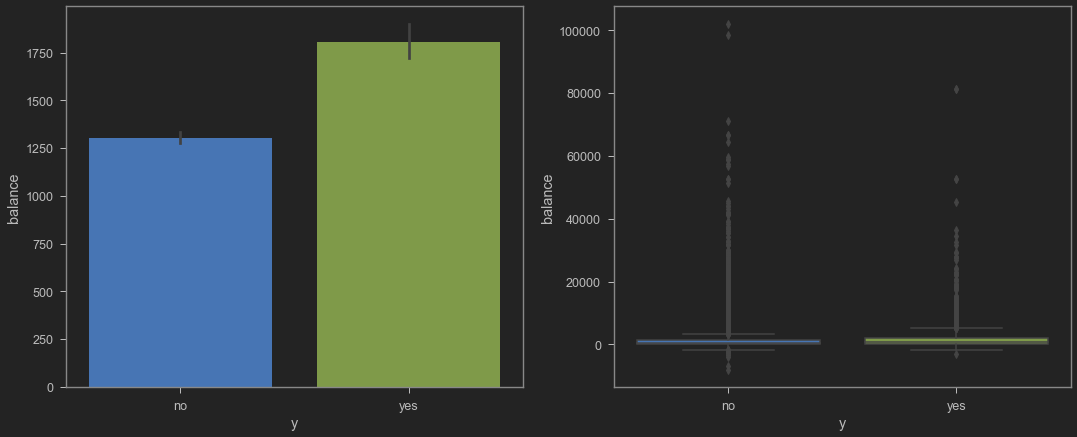

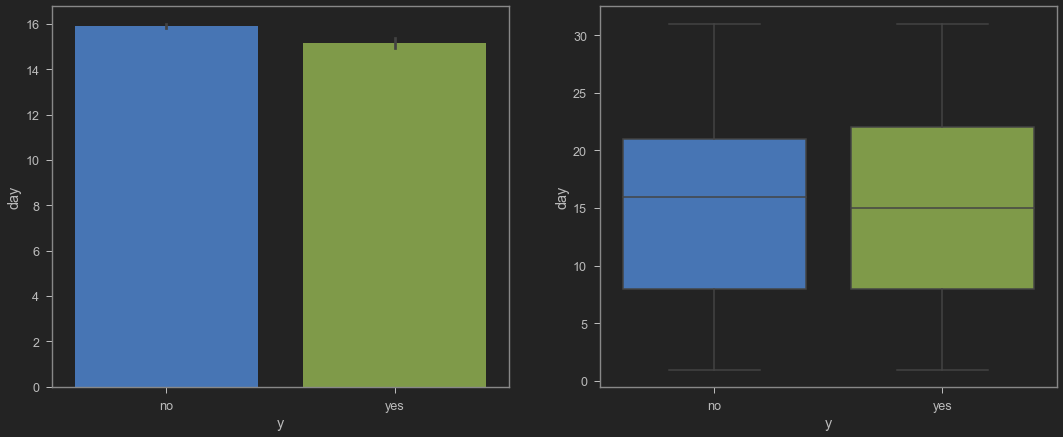

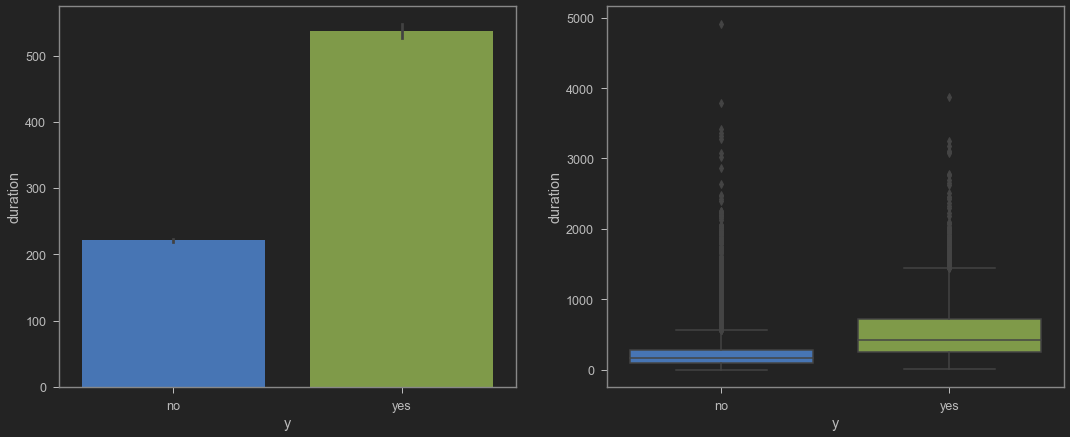

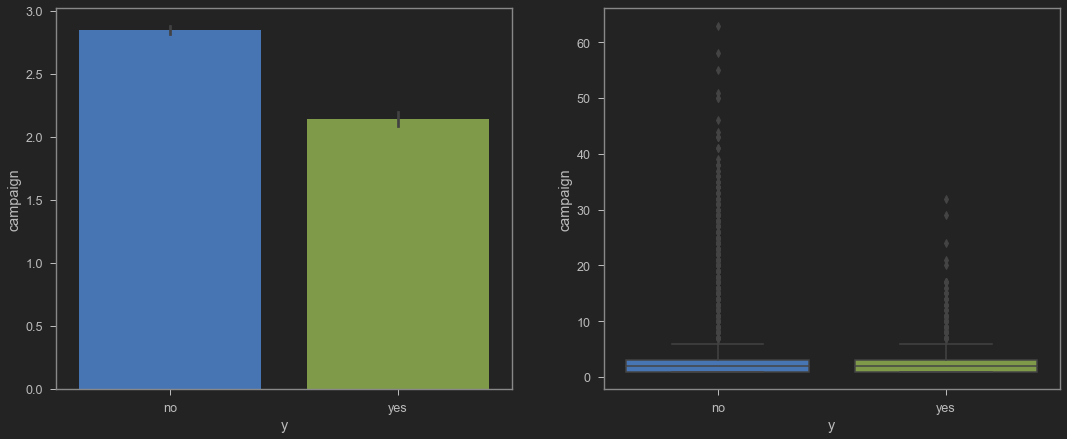

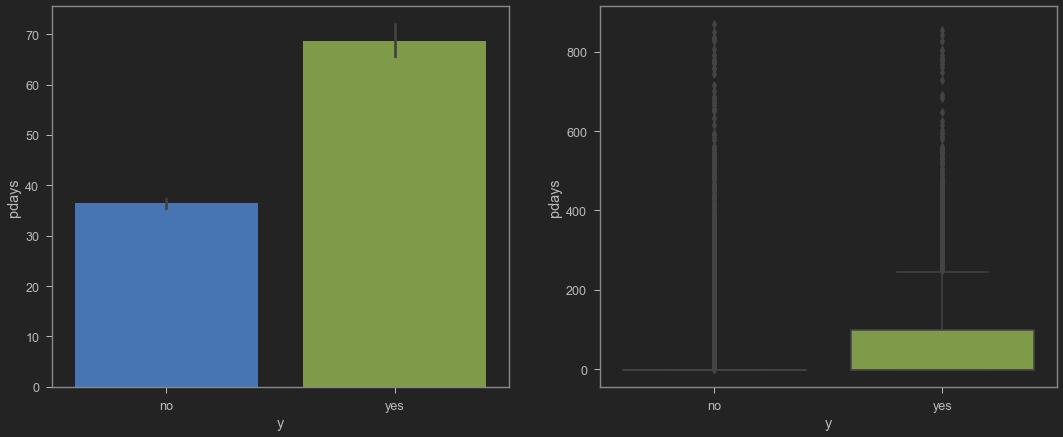

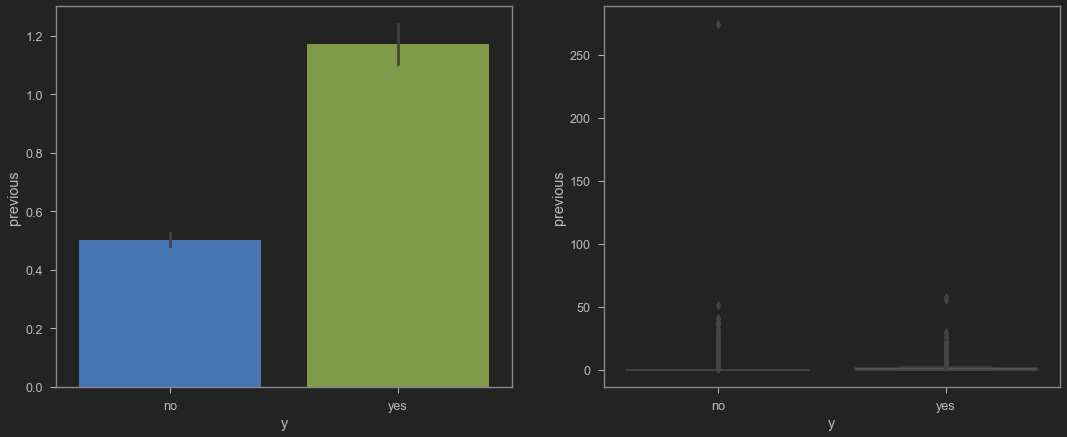

In [19]:
for i in num_col:
    plt.figure(figsize=(18,7))
    plt.subplot(1,2,1)
    sns.barplot(df['y'],df[i])
    plt.subplot(1,2,2)
    sns.boxplot(df['y'],df[i])
    plt.show()

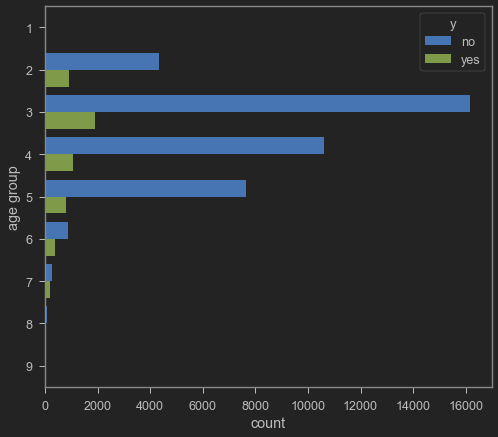

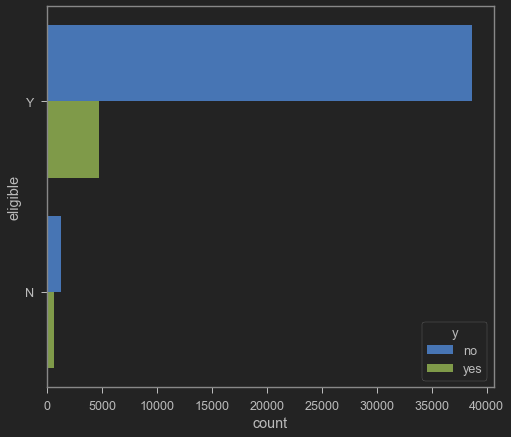

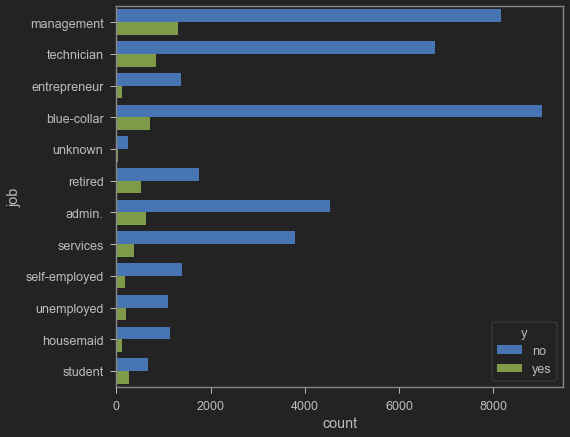

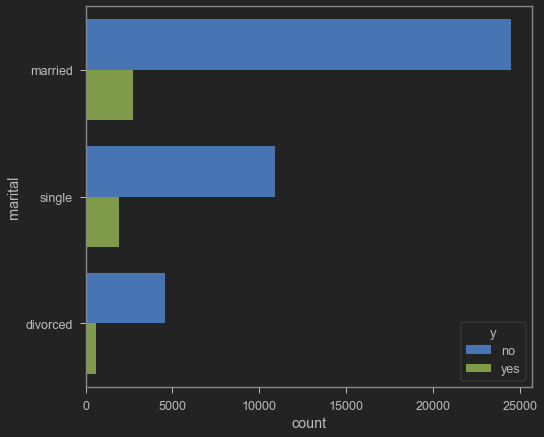

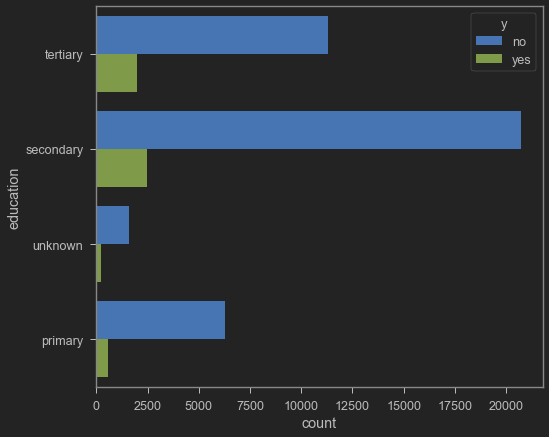

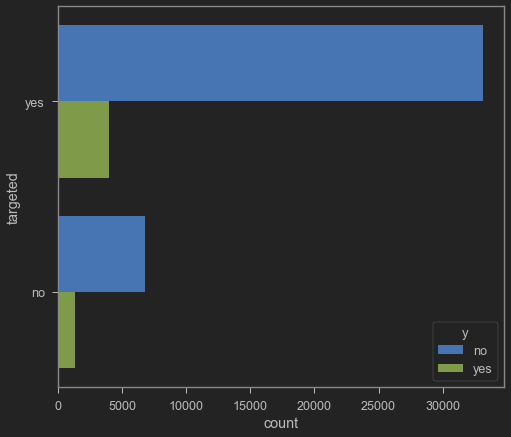

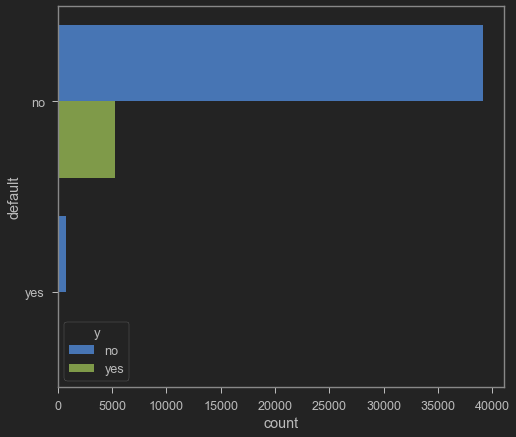

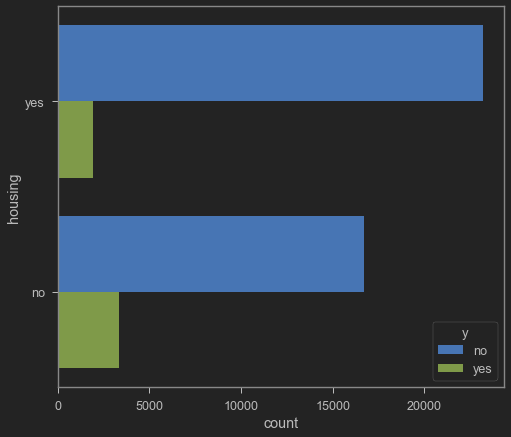

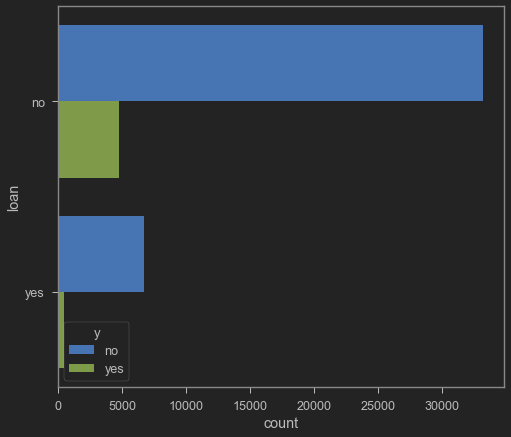

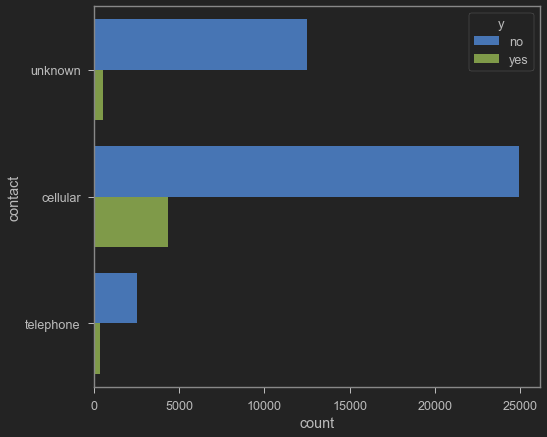

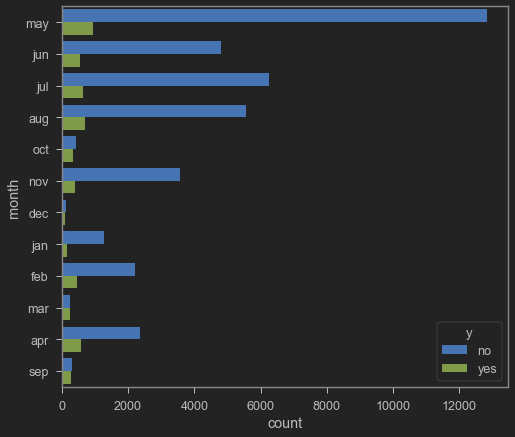

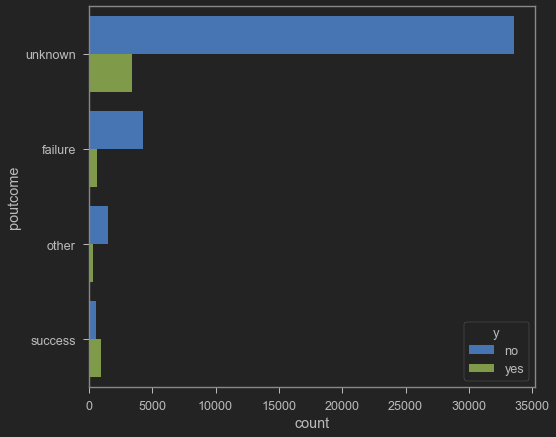

In [20]:
for i in cat_col:
    sns.countplot(y=df[i],hue=df['y'])
    plt.show()

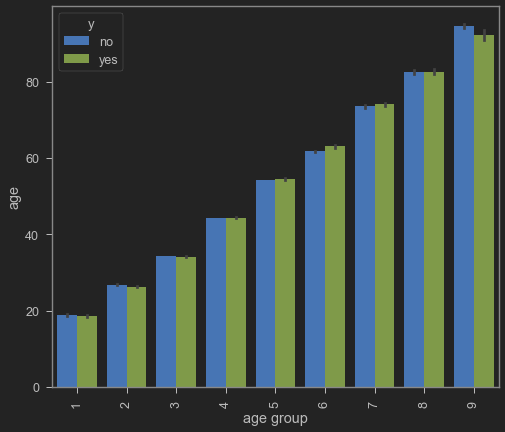

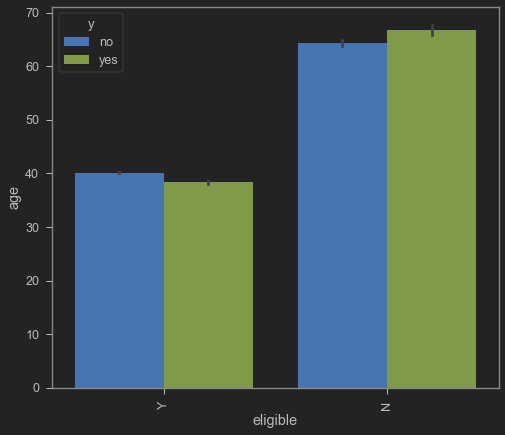

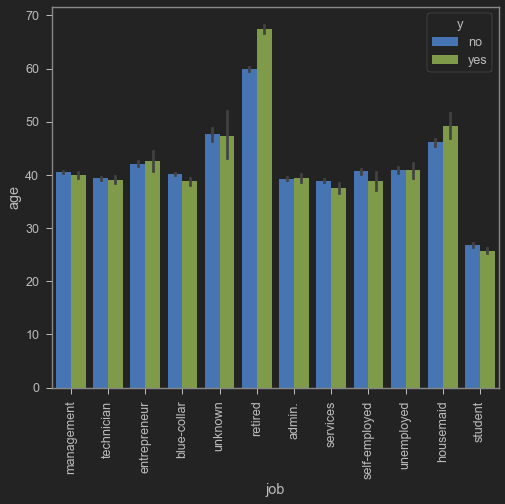

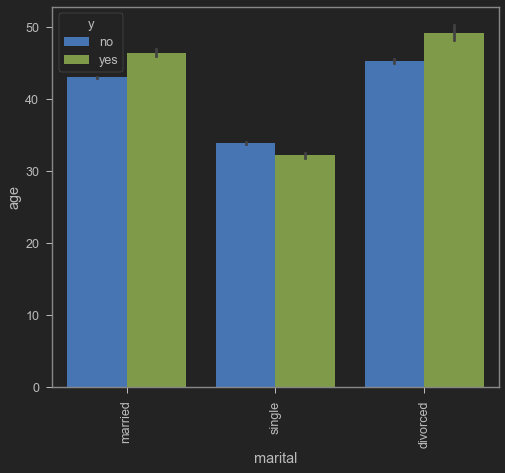

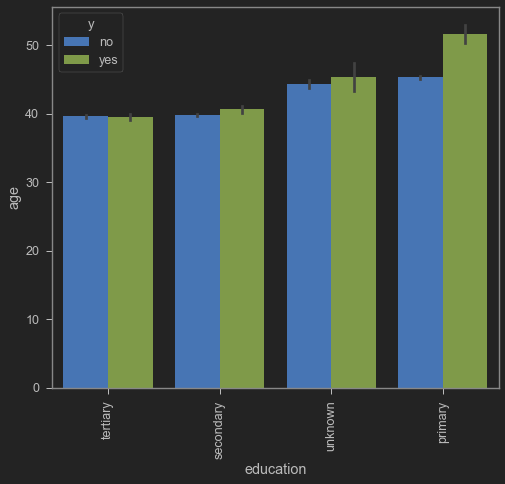

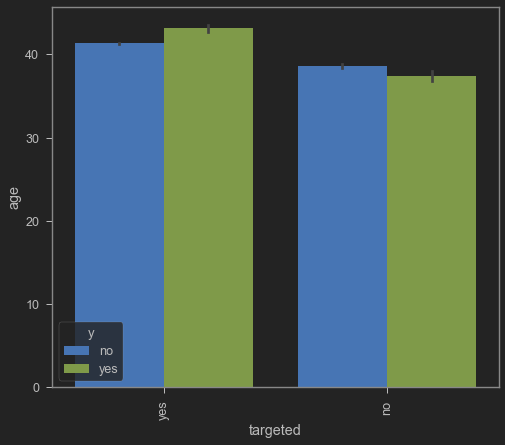

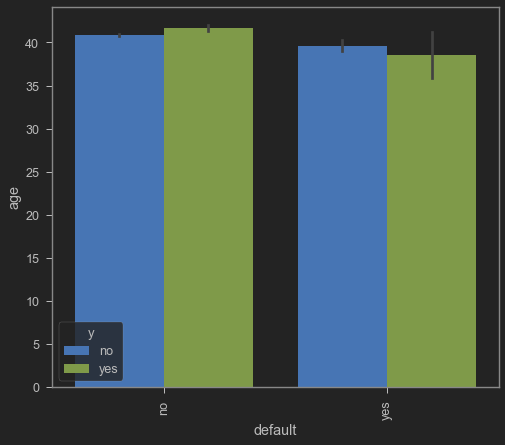

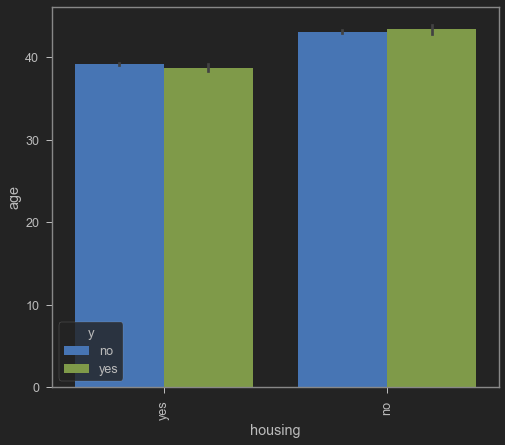

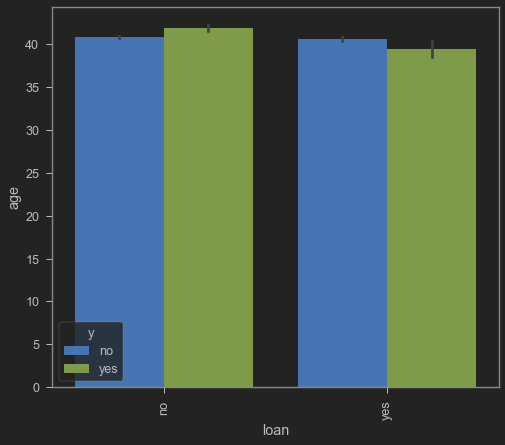

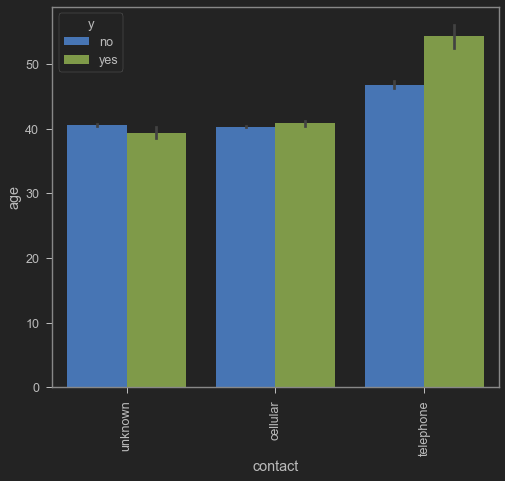

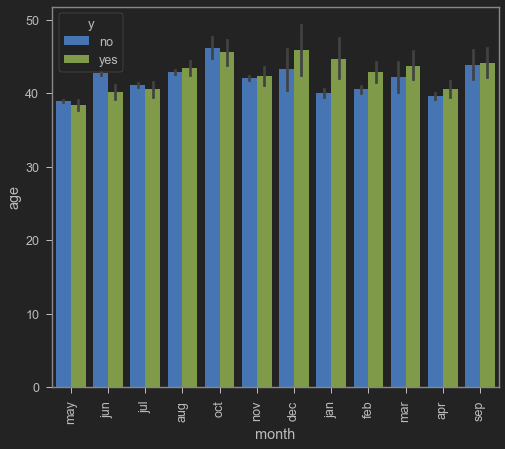

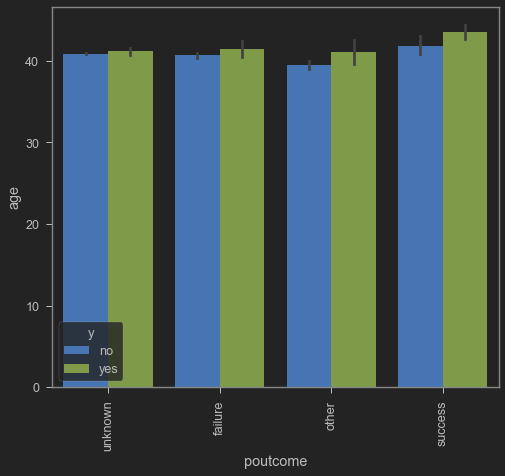

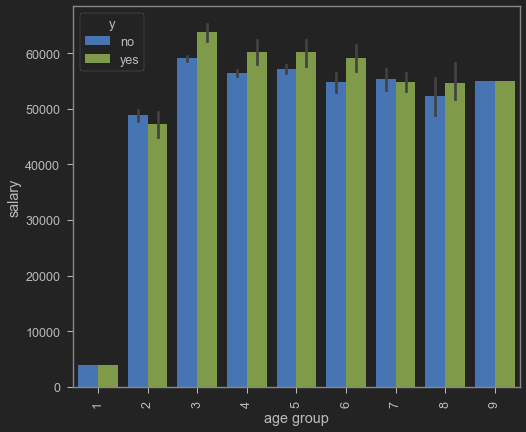

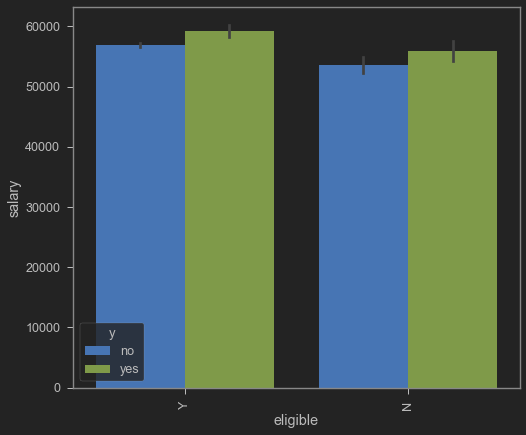

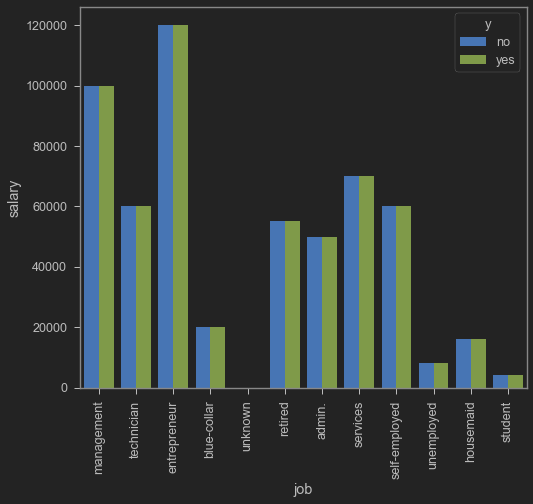

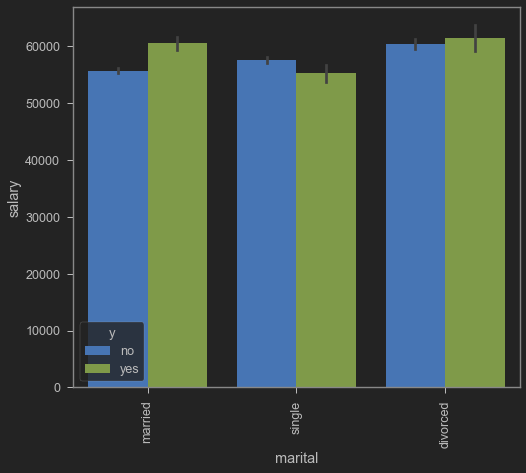

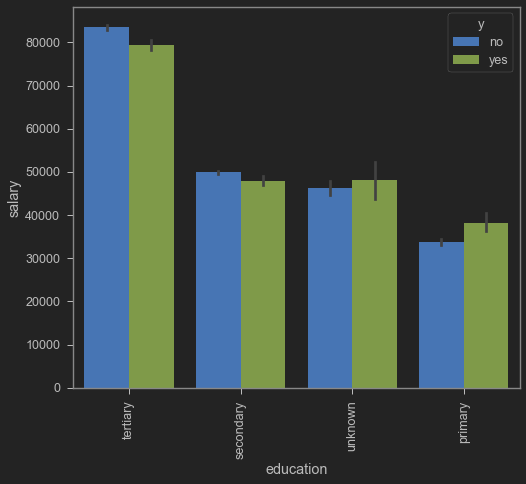

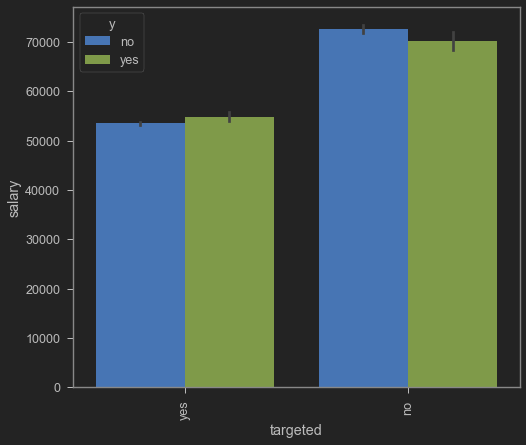

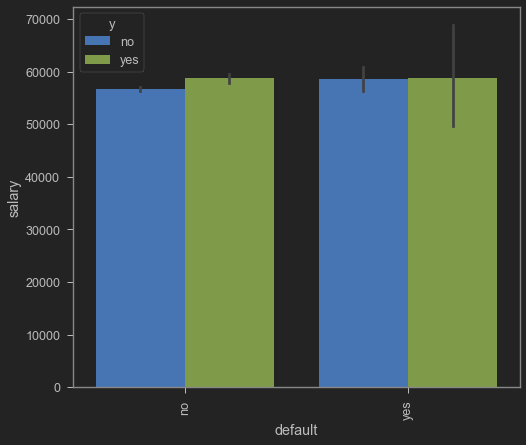

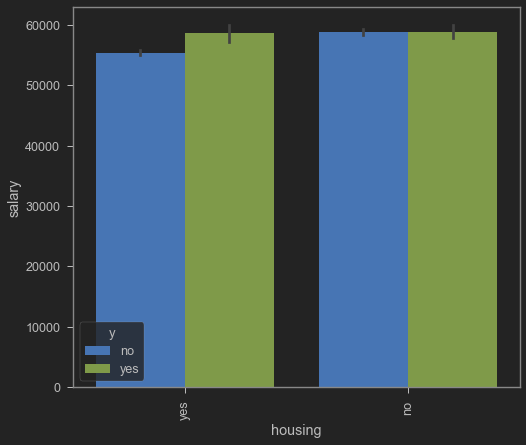

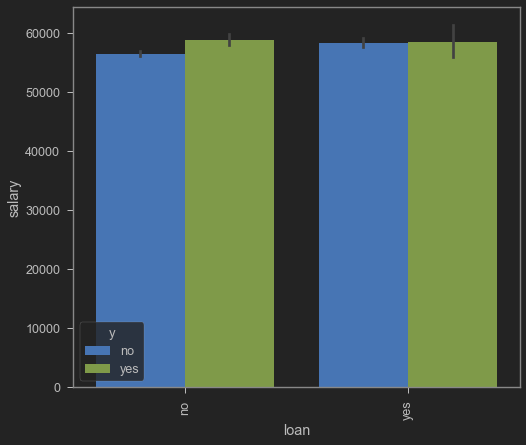

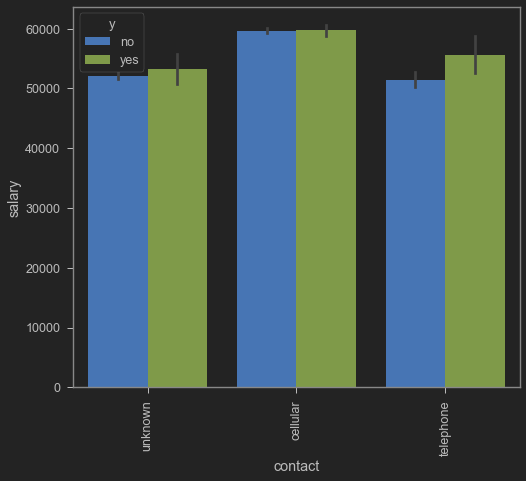

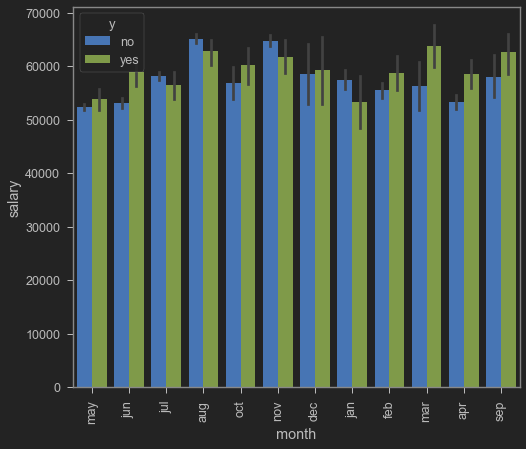

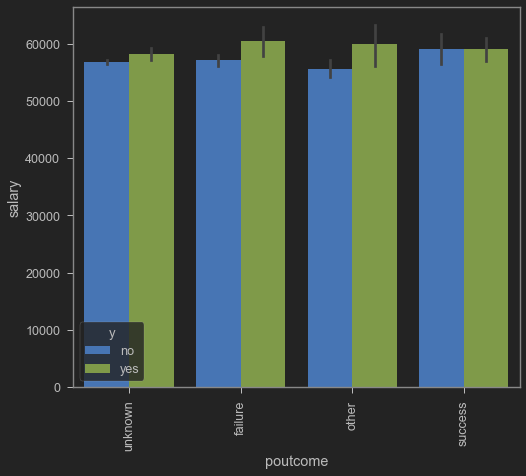

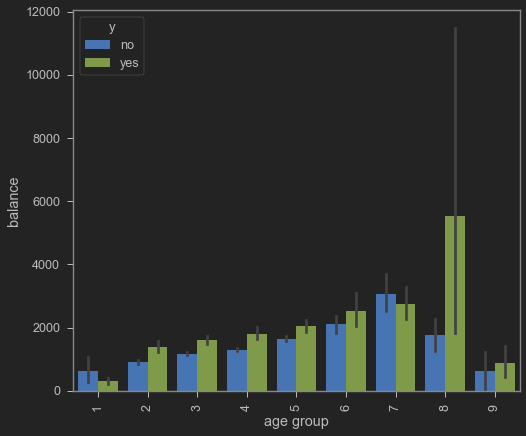

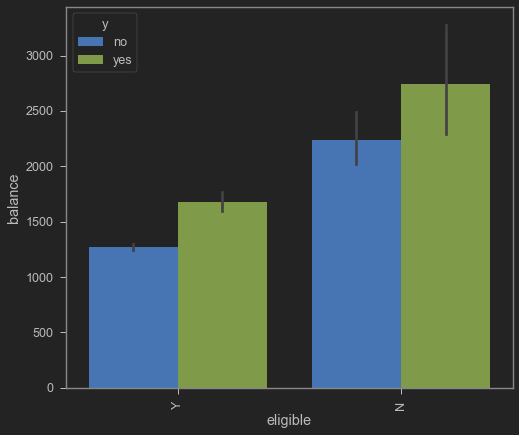

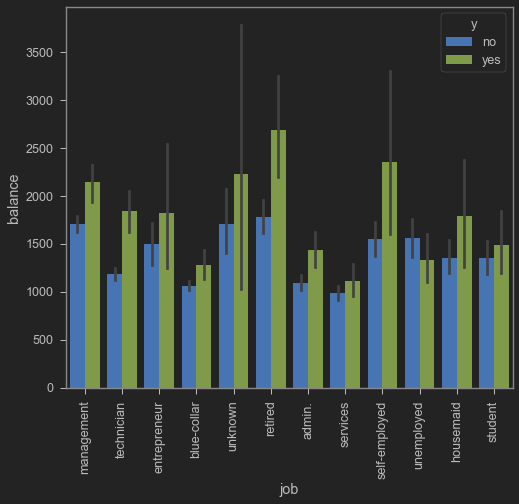

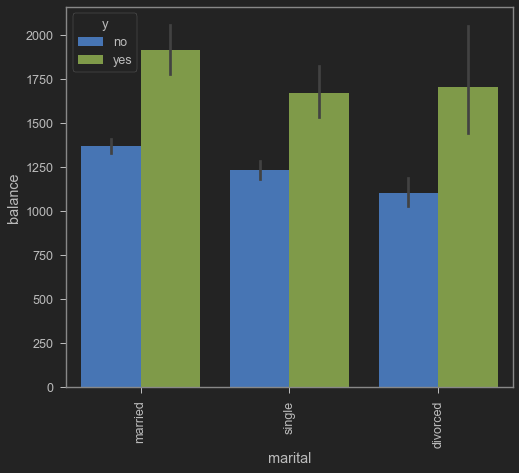

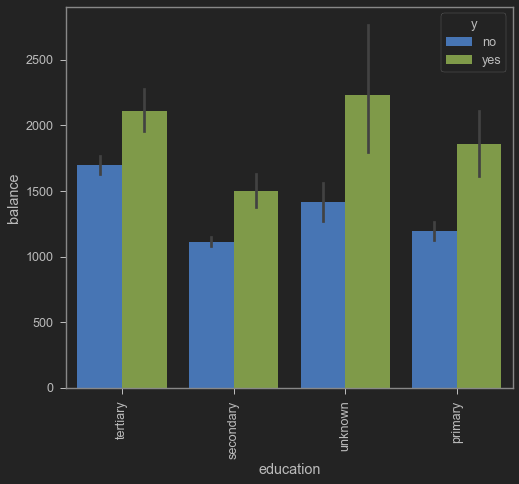

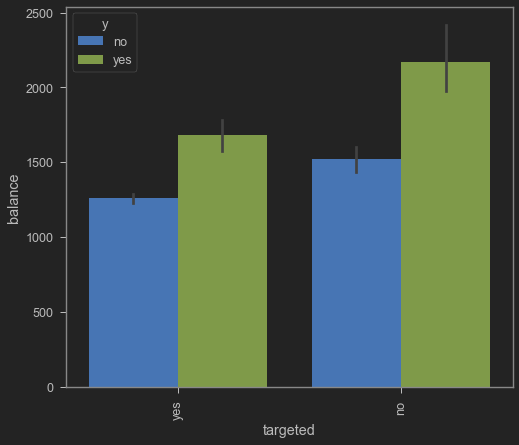

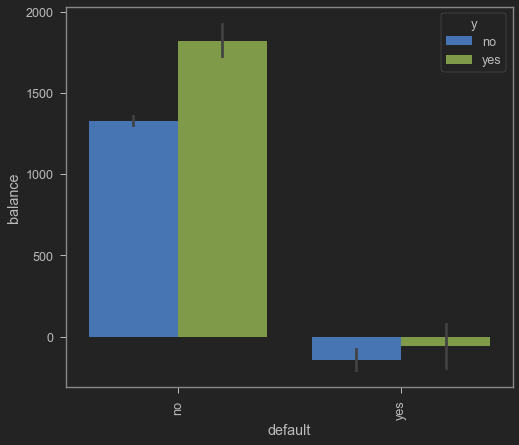

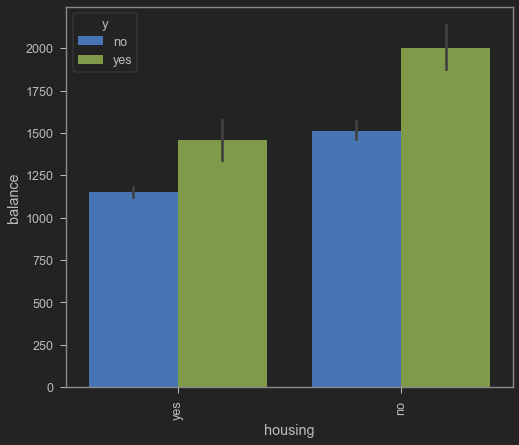

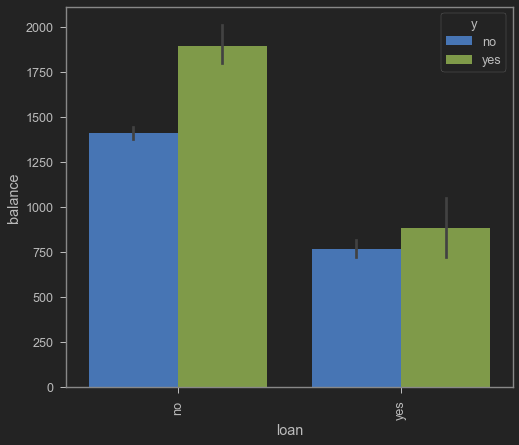

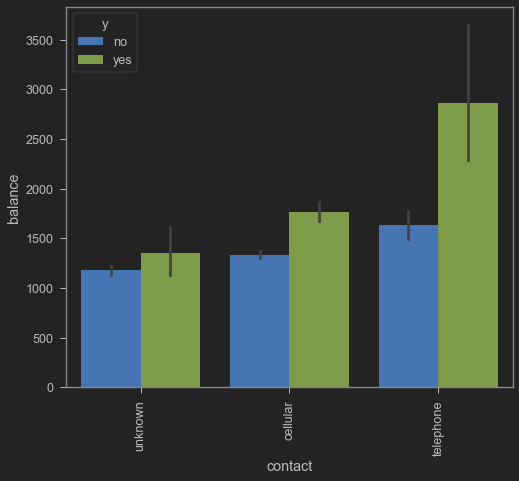

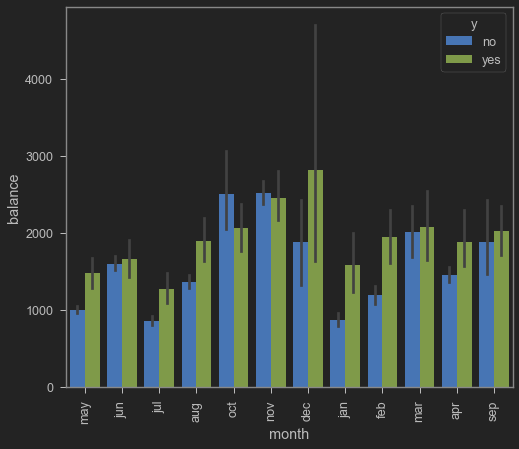

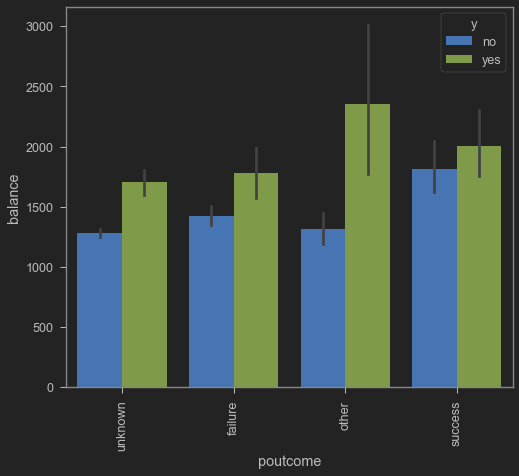

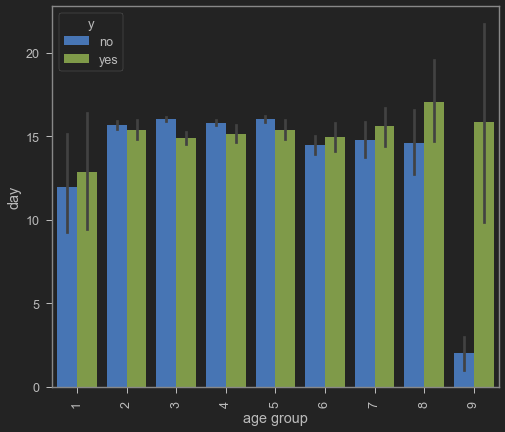

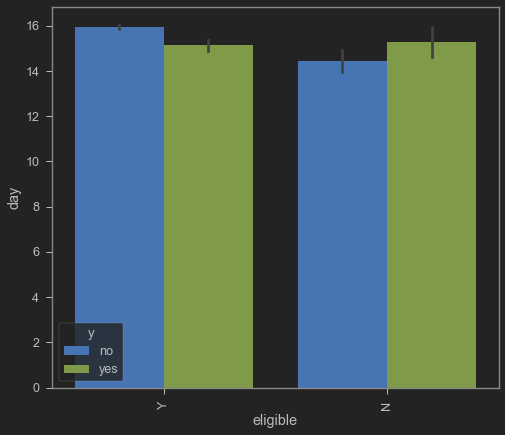

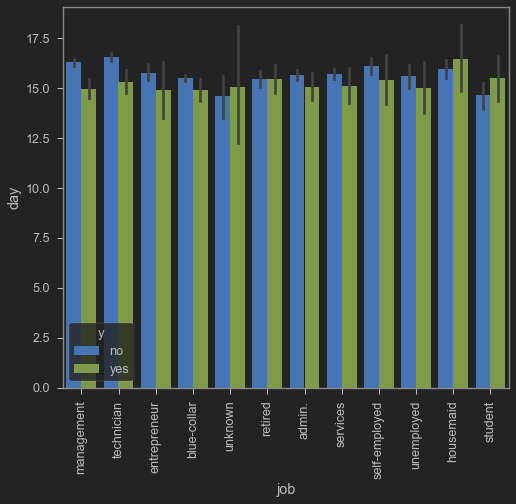

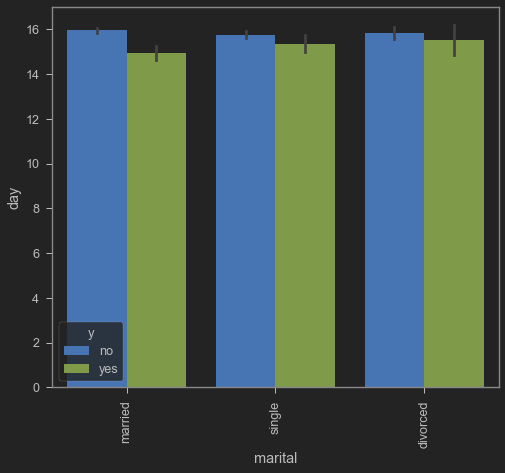

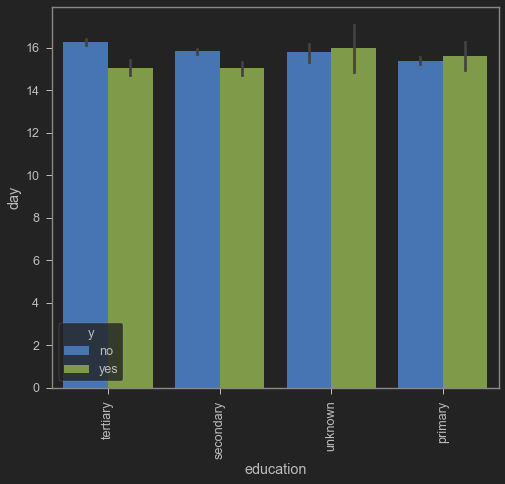

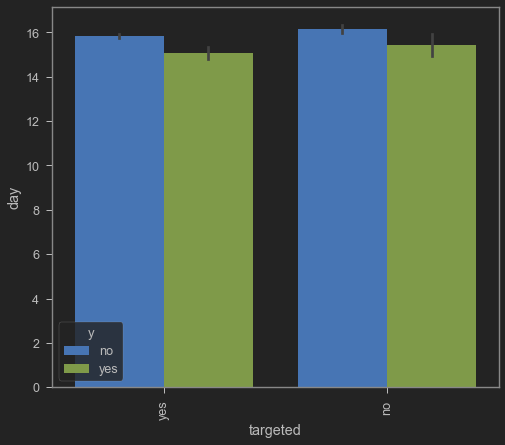

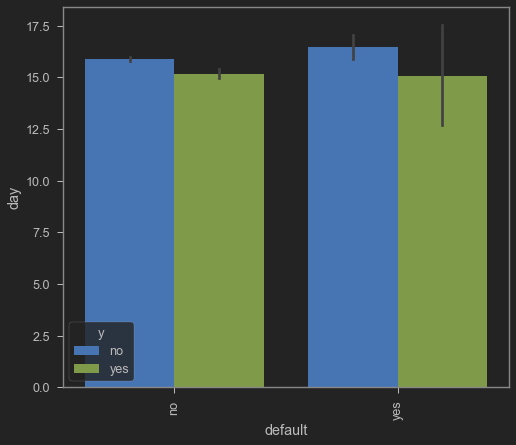

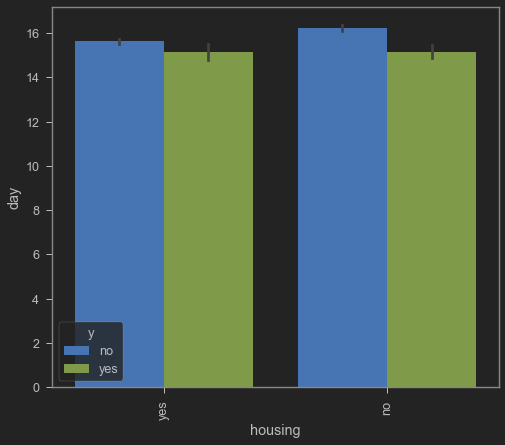

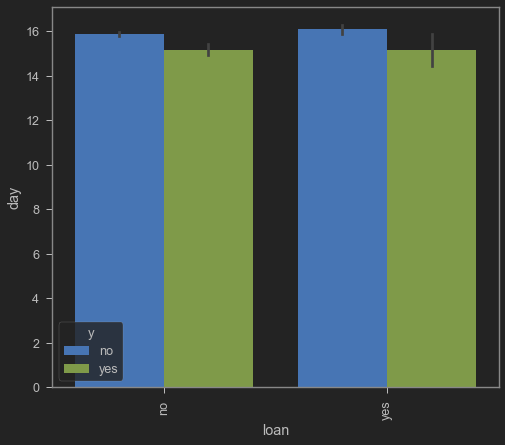

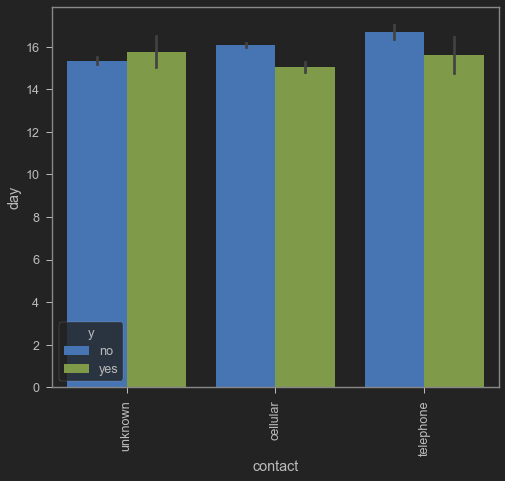

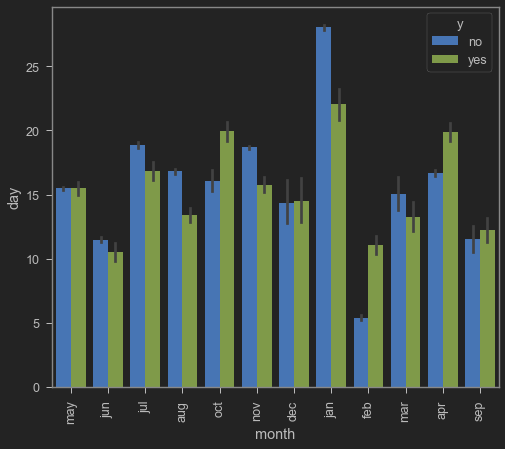

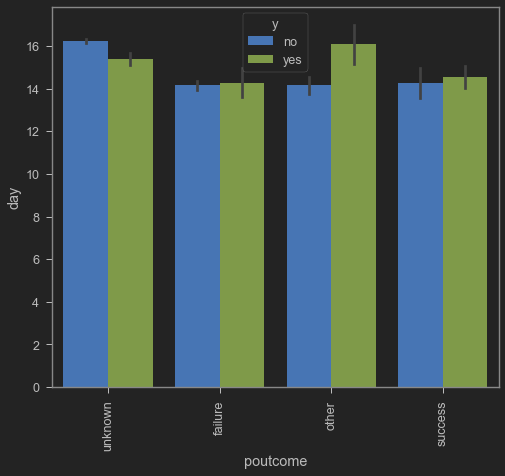

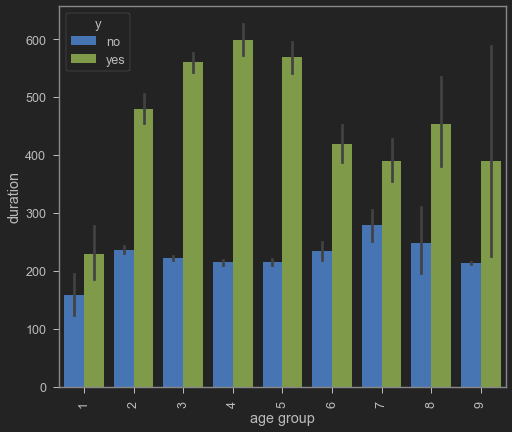

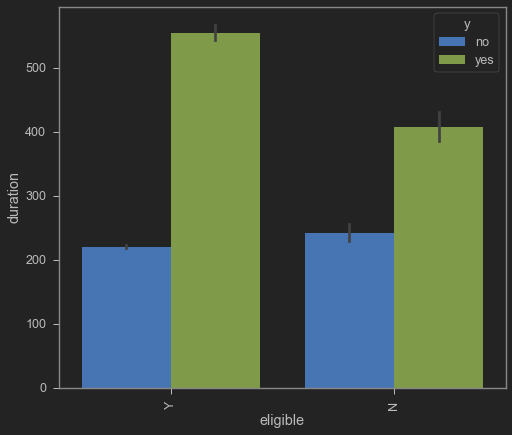

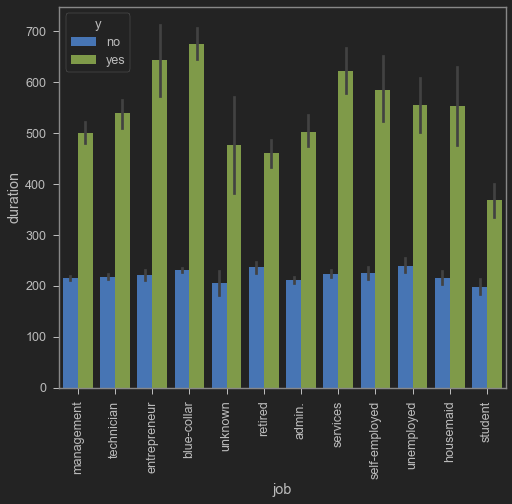

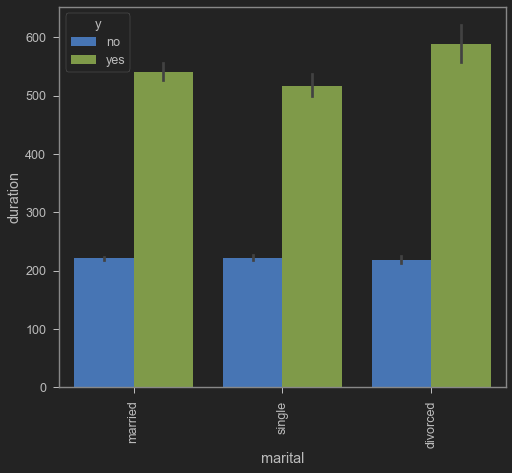

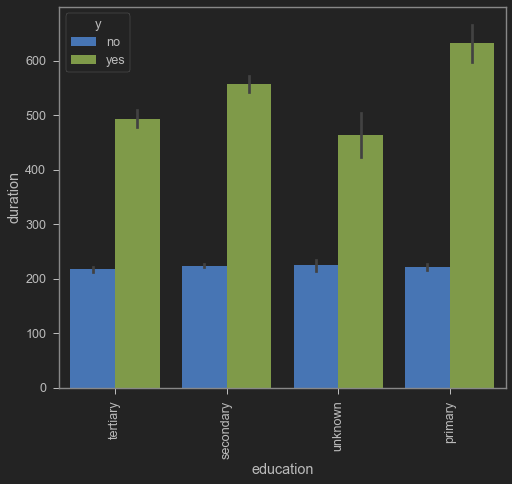

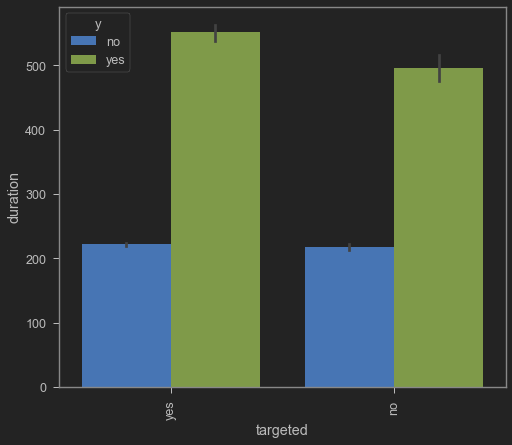

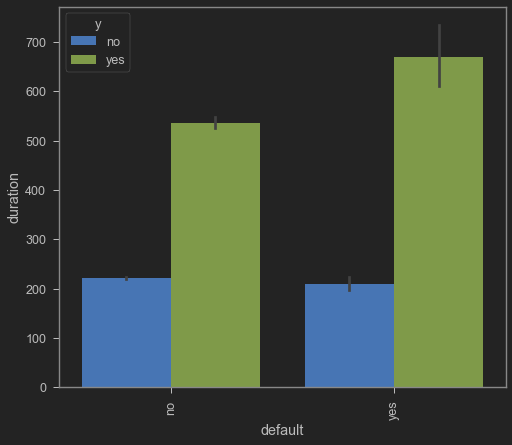

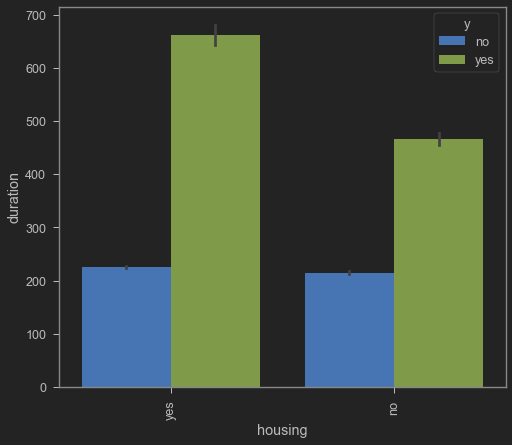

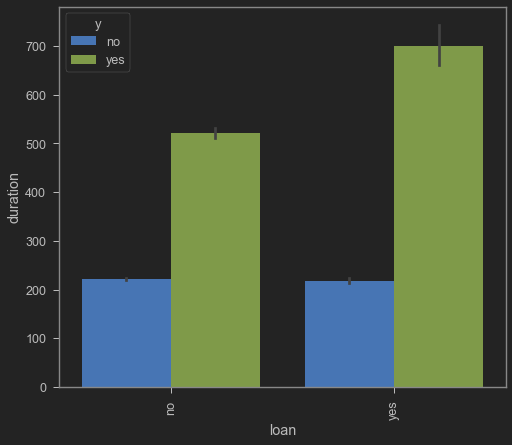

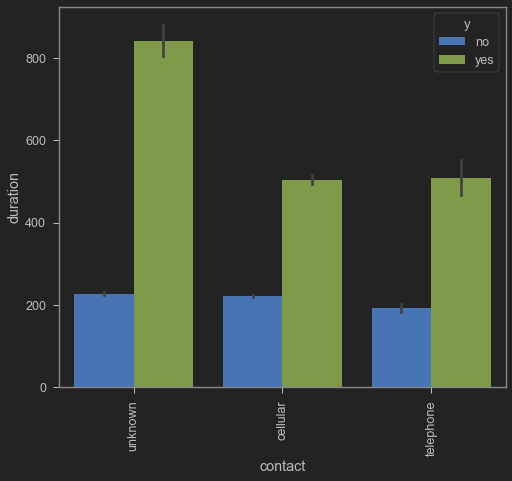

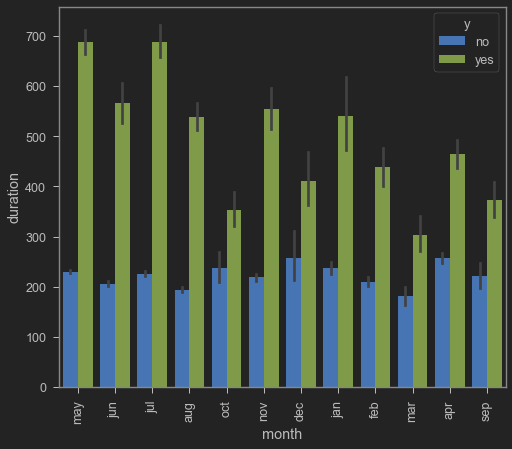

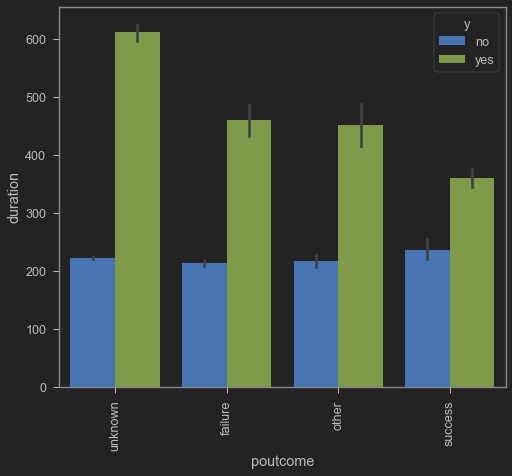

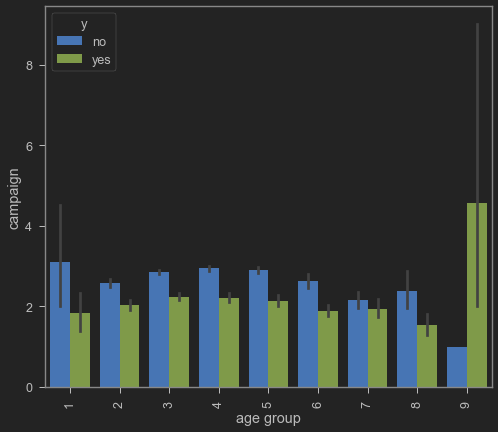

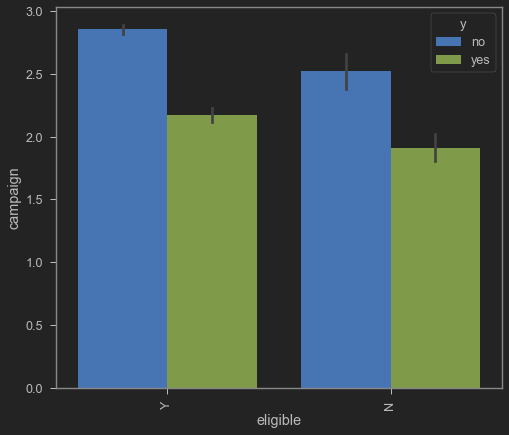

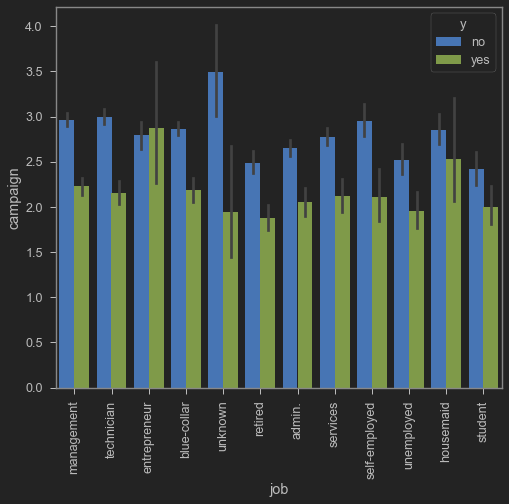

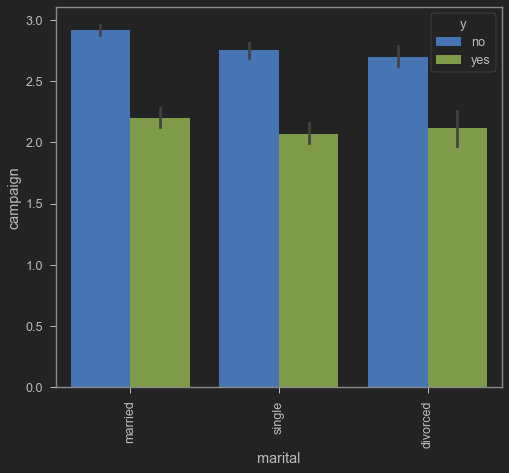

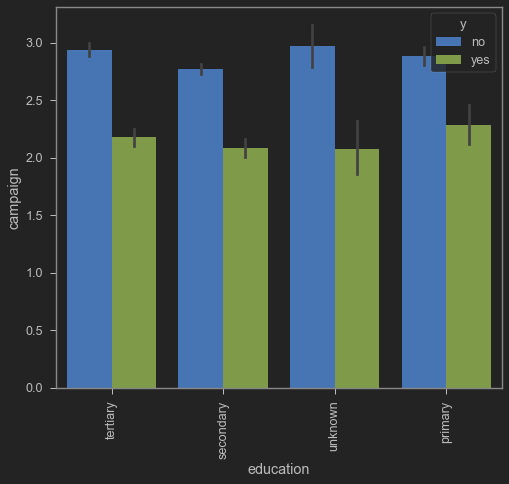

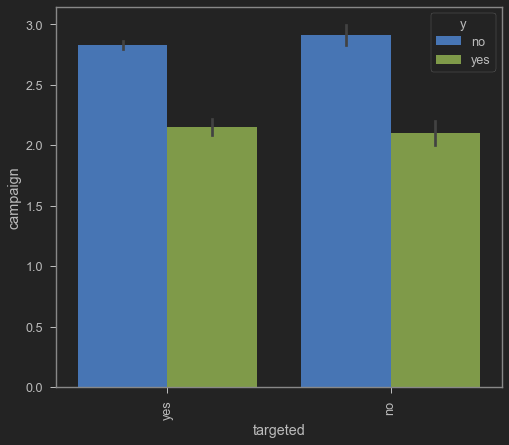

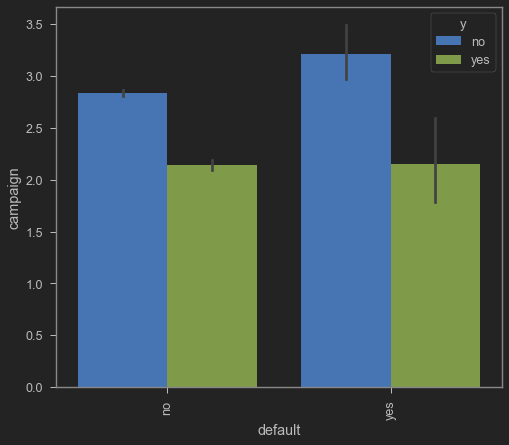

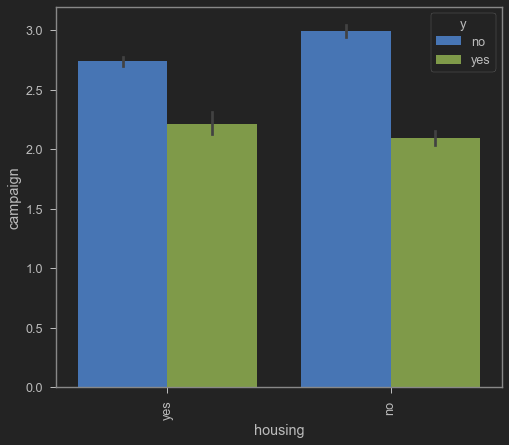

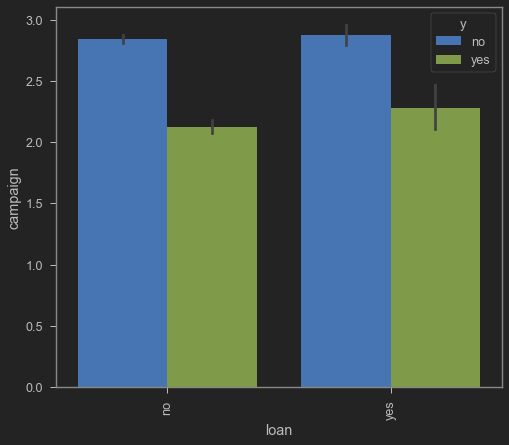

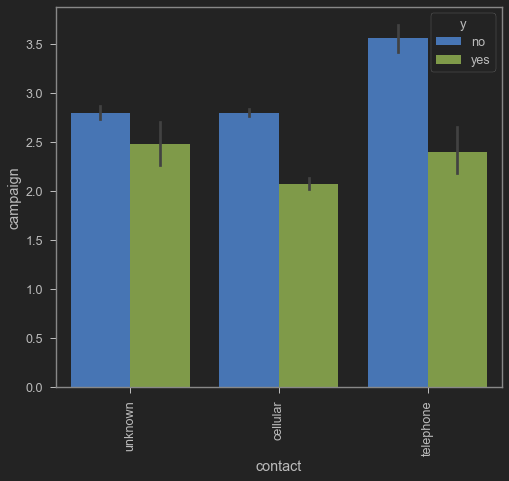

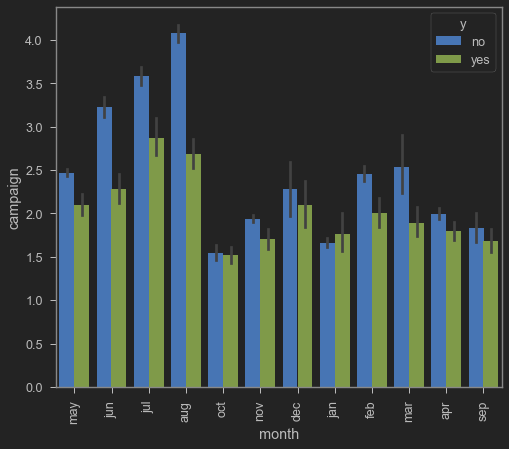

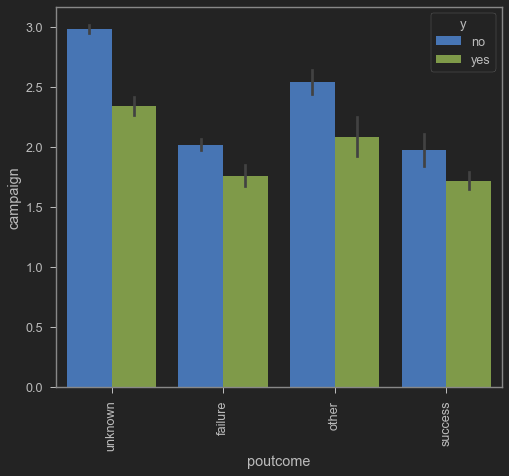

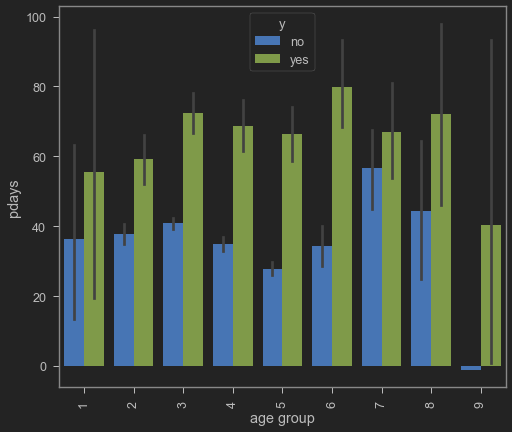

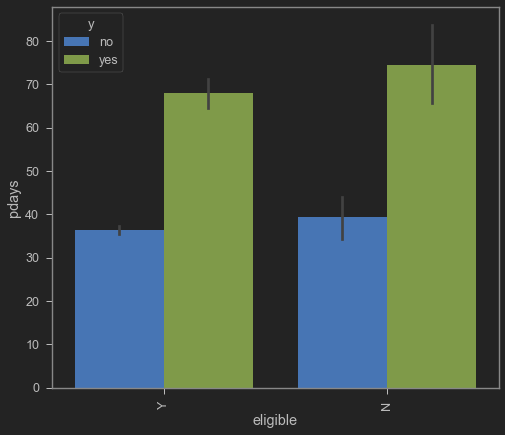

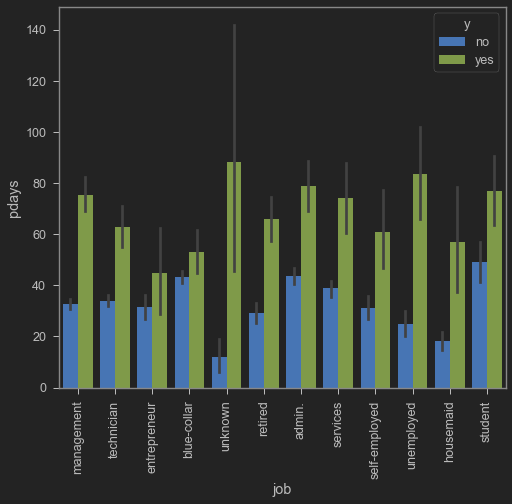

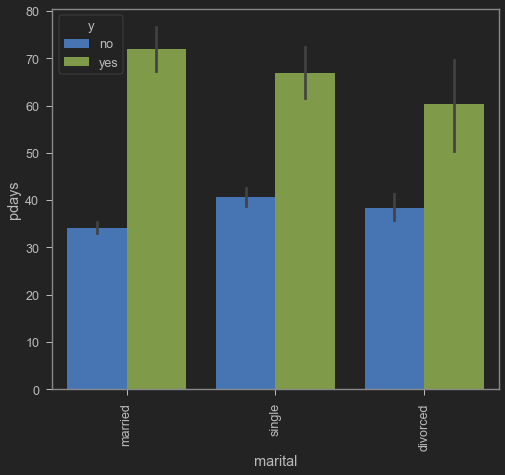

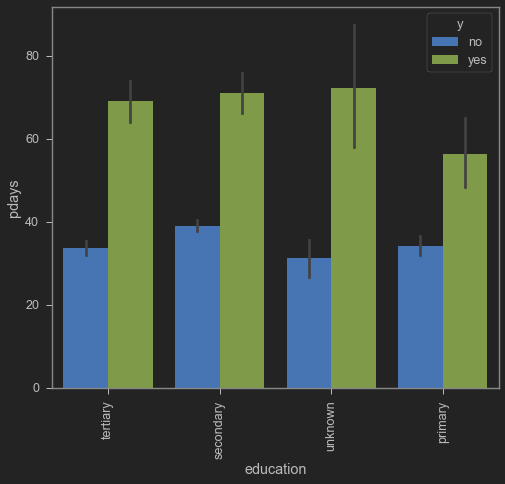

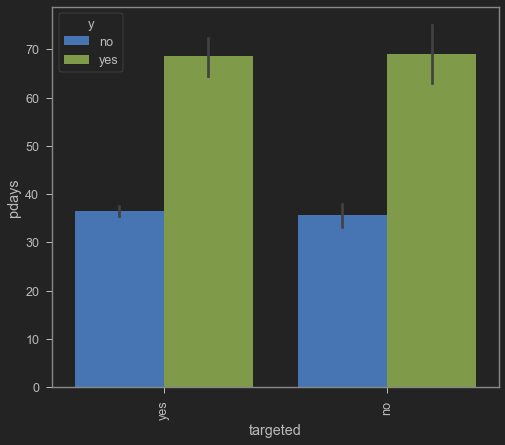

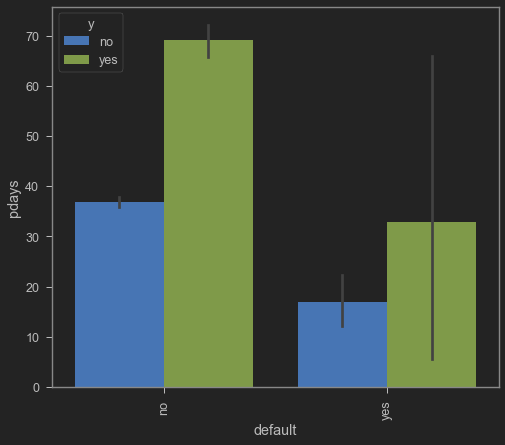

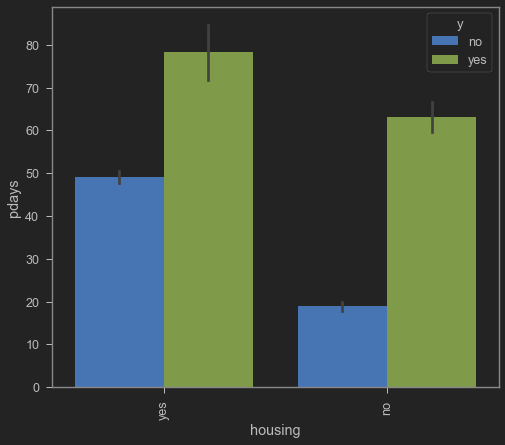

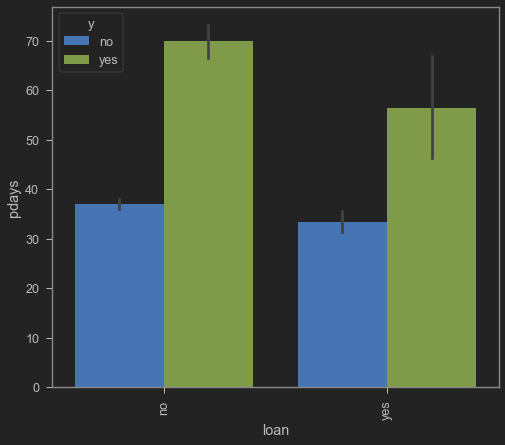

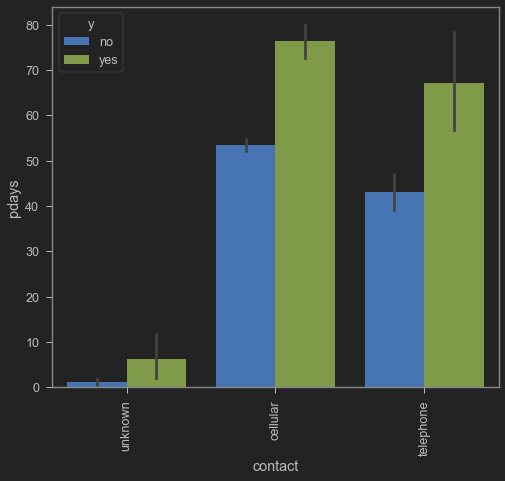

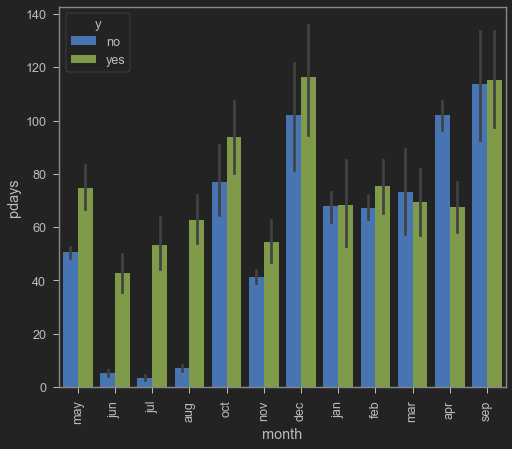

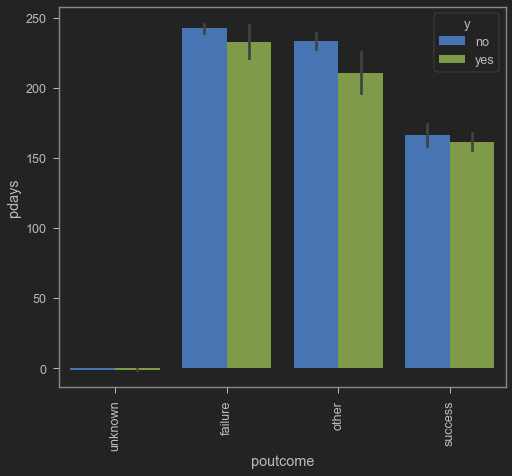

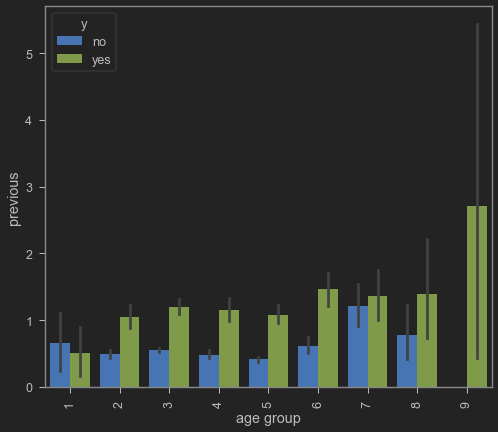

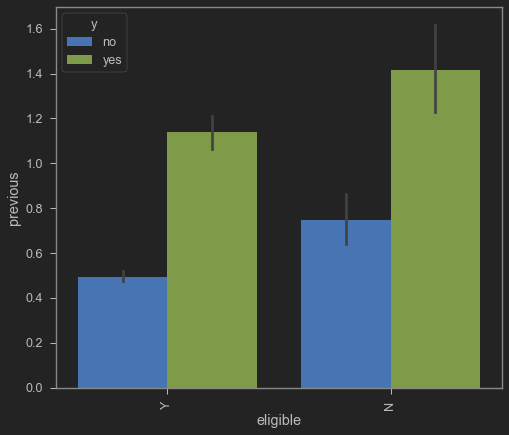

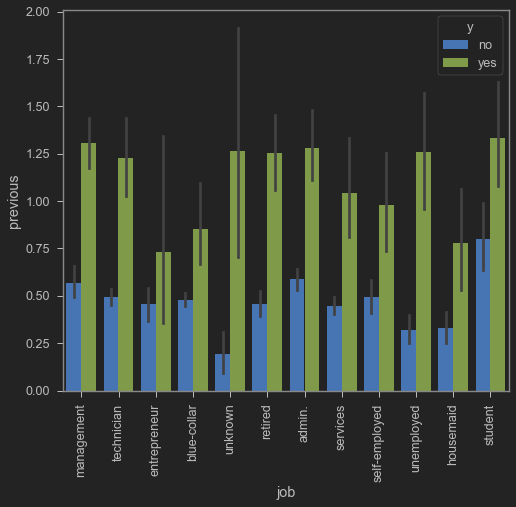

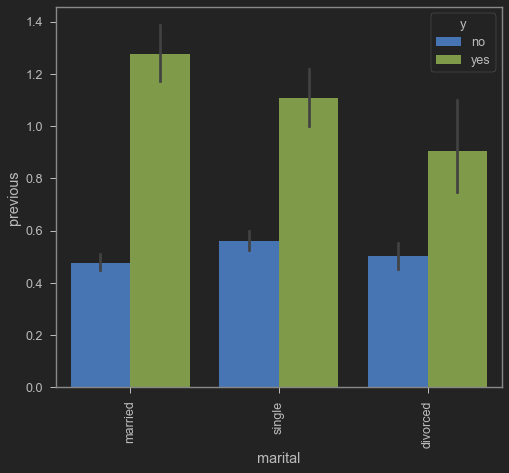

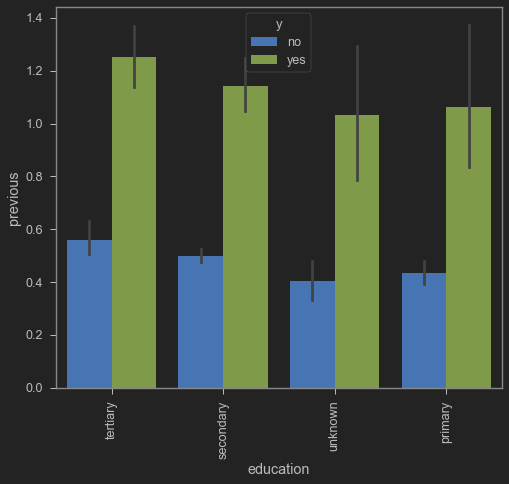

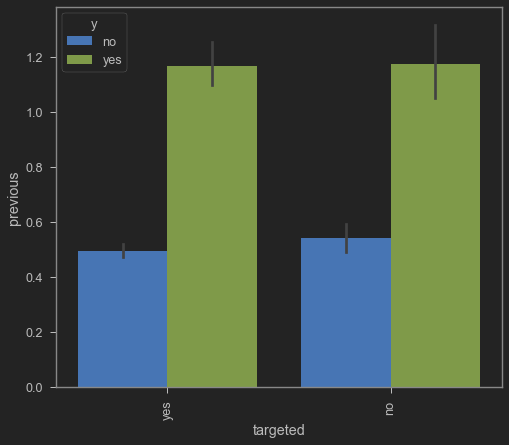

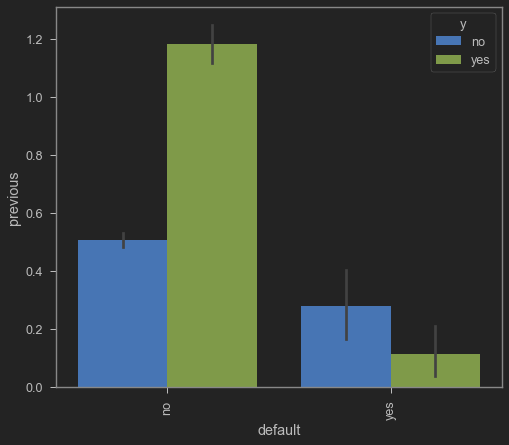

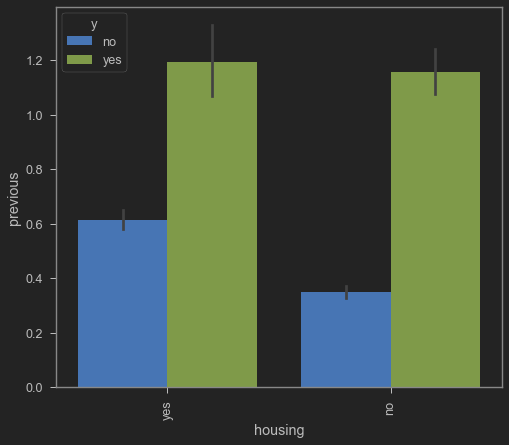

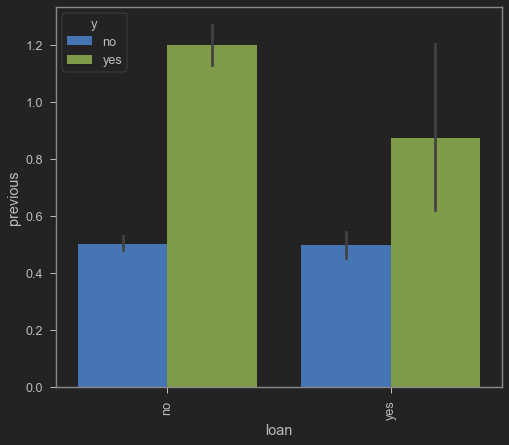

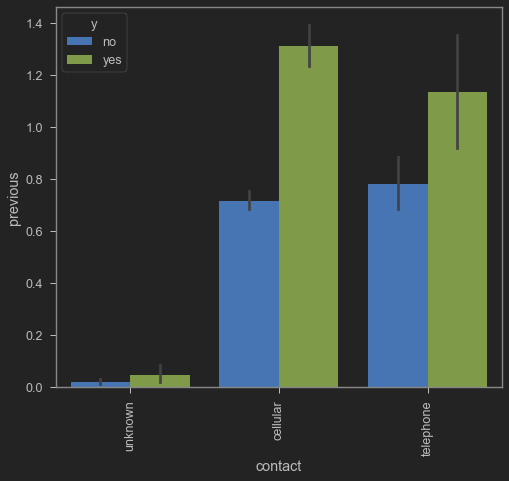

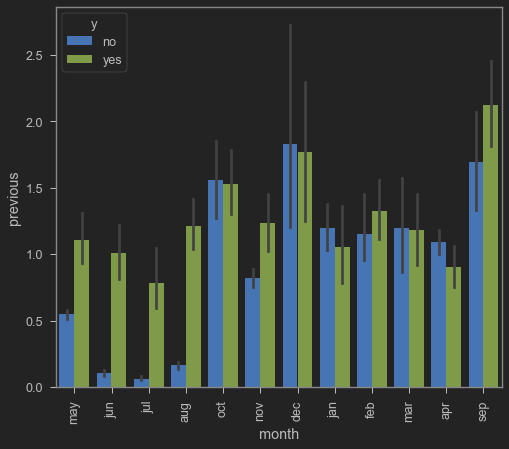

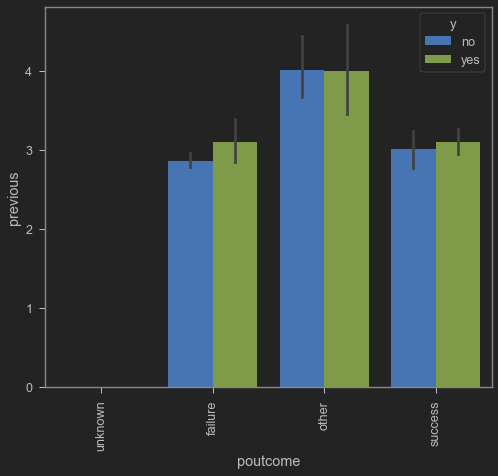

In [21]:
for i in num_col:
    for j in cat_col:
        sns.barplot(df[j],df[i],hue=df['y'])
        plt.xticks(rotation=90)
        plt.show()

In [199]:
df['y'].replace({'no':0,'yes':1},inplace=True)

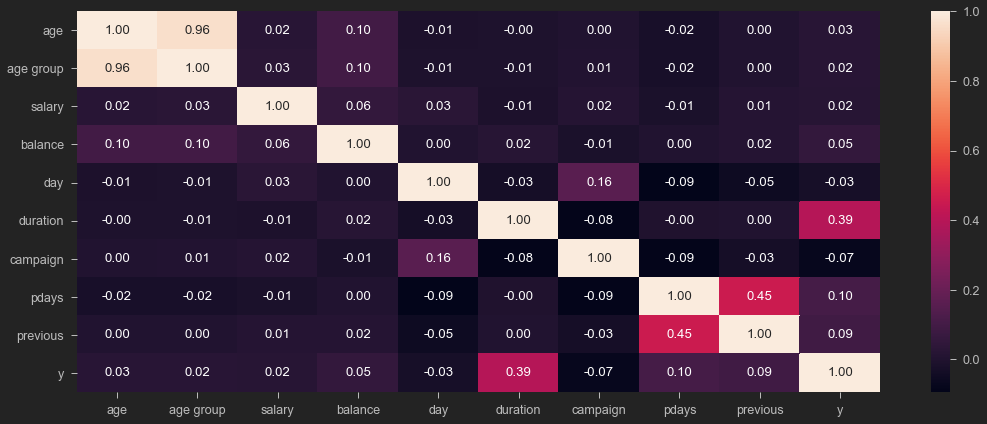

In [23]:
plt.figure(figsize=(18,7))
sns.heatmap(df.corr(),annot=True,fmt='.2f');

### Multi Collinearity Check:

In [9]:
num_col

['age',
 'salary',
 'balance',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous']

In [12]:
v = df[num_col]
vif = [VIF(v.values,i) for i in range(v.shape[1])]
vif_df = pd.DataFrame()
vif_df['numeric_features'] = v.columns
vif_df['VIF'] = vif
vif_df.sort_values('VIF',ascending=False)

numeric_features       VIF
0              age  6.379388
3              day  4.102940
1           salary  3.717447
4         duration  1.911755
5         campaign  1.831290
6            pdays  1.455194
7         previous  1.342436
2          balance  1.216352

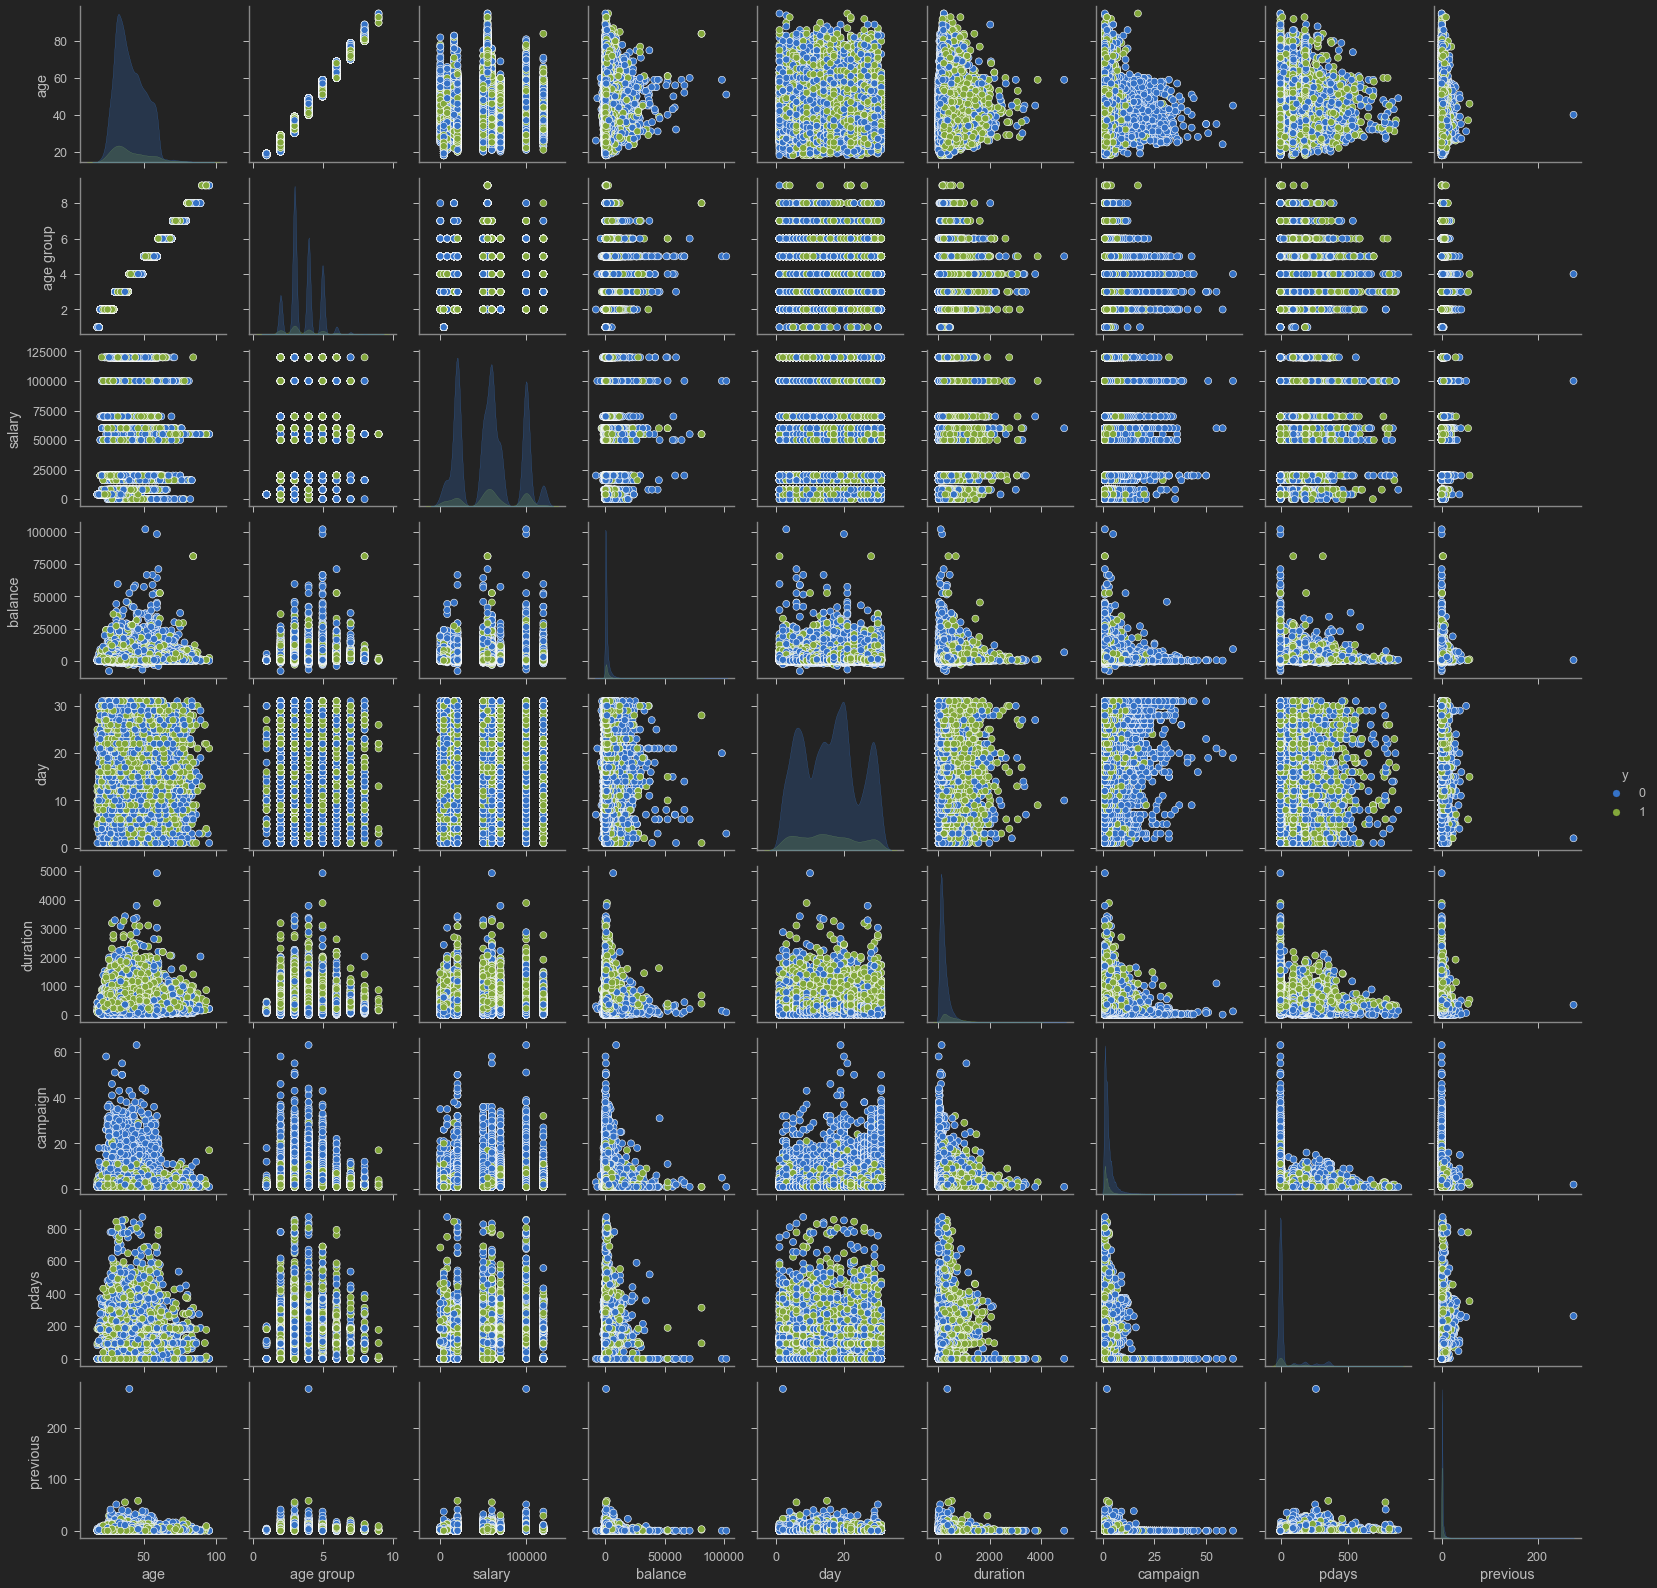

In [24]:
sns.pairplot(df,hue='y');

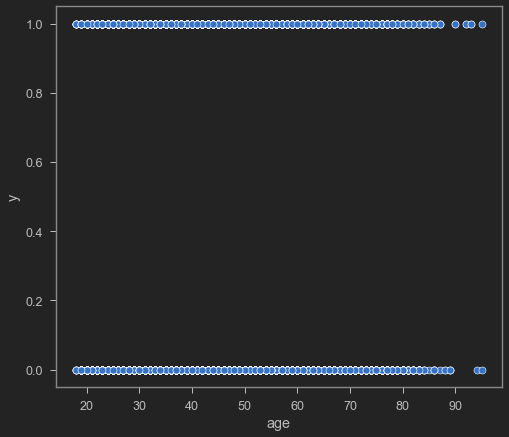

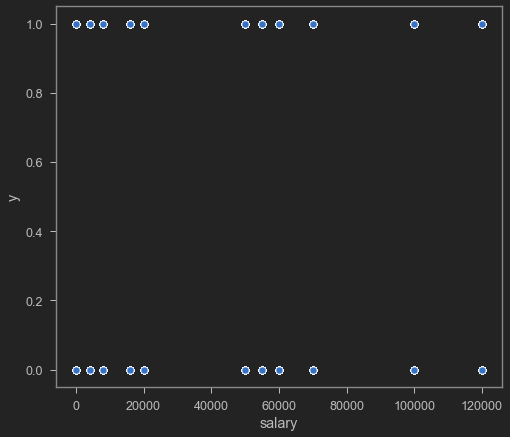

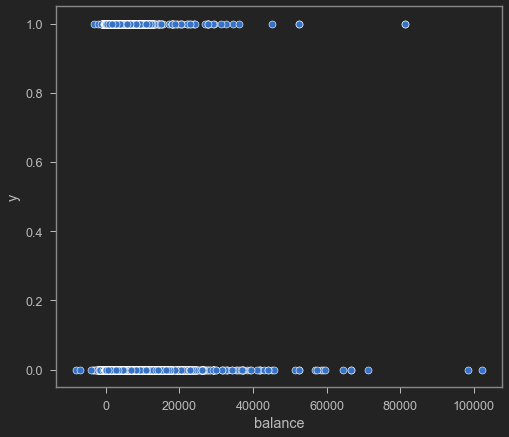

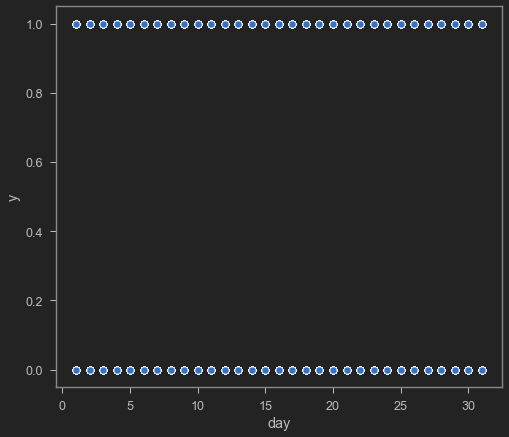

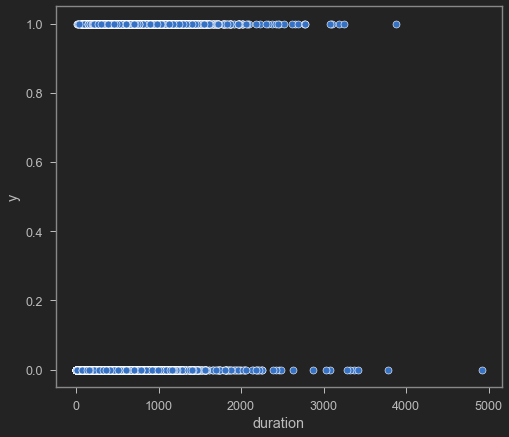

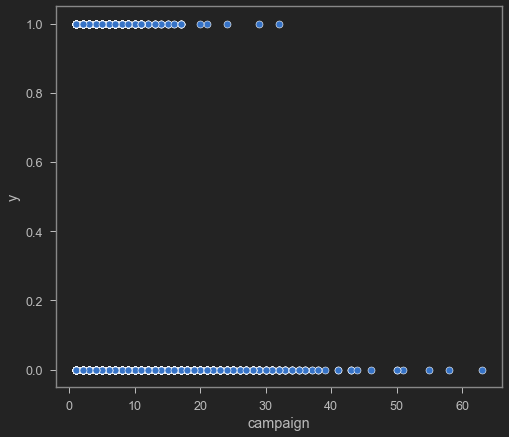

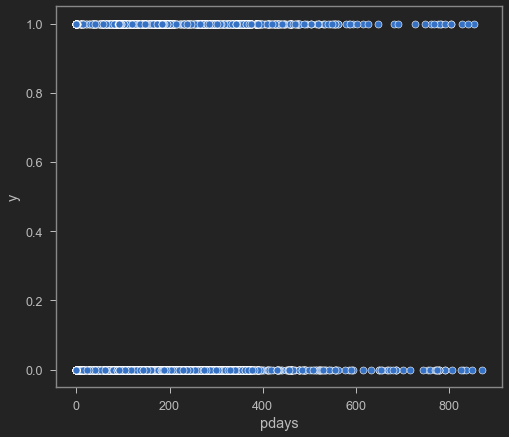

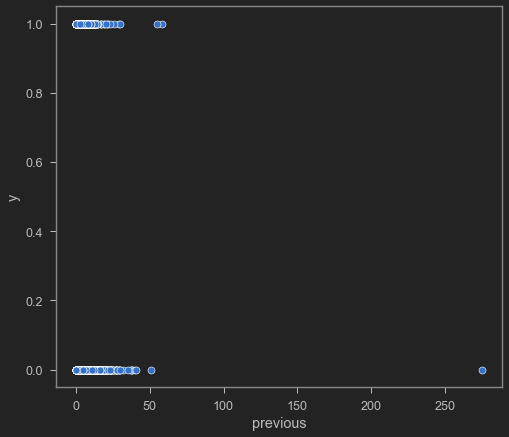

In [25]:
for i in num_col:
    sns.scatterplot(df[i],df['y'])
    plt.show()

# Treating 'Unknown' Values

In [151]:
pd.crosstab(df['job'],df['education'])

education      primary  secondary  tertiary  unknown
job                                                 
admin.             209       4219       572      171
blue-collar       3758       5371       149      454
entrepreneur       183        542       686       76
housemaid          627        395       173       45
management         294       1121      7801      242
retired            795        984       366      119
self-employed      130        577       833       39
services           345       3457       202      150
student             44        508       223      163
technician         158       5229      1968      242
unemployed         257        728       289       29
unknown             51         71        39      127

In [200]:
ind = df[(df['job']=='unknown') & (df['education']=='primary')]['job'].index
df.iloc[ind,3] = 'blue-collar'

In [201]:
ind = df[(df['job']=='unknown') & (df['education']=='secondary')]['job'].index
df.iloc[ind,3] = 'blue-collar'

In [202]:
ind = df[(df['job']=='unknown') & (df['education']=='tertiary')]['job'].index
df.iloc[ind,3] = 'management'

In [203]:
pd.crosstab(df['job'],df['education'])

education      primary  secondary  tertiary  unknown
job                                                 
admin.             209       4219       572      171
blue-collar       3809       5442       149      454
entrepreneur       183        542       686       76
housemaid          627        395       173       45
management         294       1121      7840      242
retired            795        984       366      119
self-employed      130        577       833       39
services           345       3457       202      150
student             44        508       223      163
technician         158       5229      1968      242
unemployed         257        728       289       29
unknown              0          0         0      127

In [204]:
ind = df[(df['education']=='unknown') & (df['job']=='admin.')]['education'].index
df.iloc[ind,6] = 'secondary'

In [205]:
ind = df[(df['education']=='unknown') & (df['job']=='blue-collar')]['education'].index
df.iloc[ind,6] = 'secondary'

In [206]:
ind = df[(df['education']=='unknown') & (df['job']=='entrepreneur')]['education'].index
df.iloc[ind,6] = 'tertiary'

In [207]:
ind = df[(df['education']=='unknown') & (df['job']=='housemaid')]['education'].index
df.iloc[ind,6] = 'primary'

In [208]:
ind = df[(df['education']=='unknown') & (df['job']=='management')]['education'].index
df.iloc[ind,6] = 'tertiary'

In [209]:
ind = df[(df['education']=='unknown') & (df['job']=='retired')]['education'].index
df.iloc[ind,6] = 'secondary'

In [210]:
ind = df[(df['education']=='unknown') & (df['job']=='self-employed')]['education'].index
df.iloc[ind,6] = 'tertiary'

In [211]:
ind = df[(df['education']=='unknown') & (df['job']=='services')]['education'].index
df.iloc[ind,6] = 'secondary'

In [212]:
ind = df[(df['education']=='unknown') & (df['job']=='student')]['education'].index
df.iloc[ind,6] = 'secondary'

In [213]:
ind = df[(df['education']=='unknown') & (df['job']=='technician')]['education'].index
df.iloc[ind,6] = 'secondary'

In [214]:
ind = df[(df['education']=='unknown') & (df['job']=='unemployed')]['education'].index
df.iloc[ind,6] = 'secondary'

In [115]:
pd.crosstab(df['job'],df['education'])

education      primary  secondary  tertiary  unknown
job                                                 
admin.             209       4390       572        0
blue-collar       3809       5896       149        0
entrepreneur       183        542       762        0
housemaid          672        395       173        0
management         294       1121      8082        0
retired            795       1103       366        0
self-employed      130        577       872        0
services           345       3607       202        0
student             44        671       223        0
technician         158       5471      1968        0
unemployed         257        757       289        0
unknown              0          0         0      127

In [215]:
ind = df[(df['education']=='unknown') & (df['job']=='unknown')].index
df.drop(index=ind,inplace=True)

In [216]:
pd.crosstab(df['job'],df['education'])

education      primary  secondary  tertiary
job                                        
admin.             209       4390       572
blue-collar       3809       5896       149
entrepreneur       183        542       762
housemaid          672        395       173
management         294       1121      8082
retired            795       1103       366
self-employed      130        577       872
services           345       3607       202
student             44        671       223
technician         158       5471      1968
unemployed         257        757       289

In [217]:
df['contact'].value_counts()

cellular     29236
unknown      12966
telephone     2882
Name: contact, dtype: int64

In [218]:
df['contact'].mode()[0]

'cellular'

In [219]:
df['contact'].replace({'unknown':df['contact'].mode()[0]},inplace=True)

In [220]:
df['poutcome'].value_counts()

unknown    36843
failure     4896
other       1839
success     1506
Name: poutcome, dtype: int64

In [221]:
df.drop('poutcome',1,inplace=True)

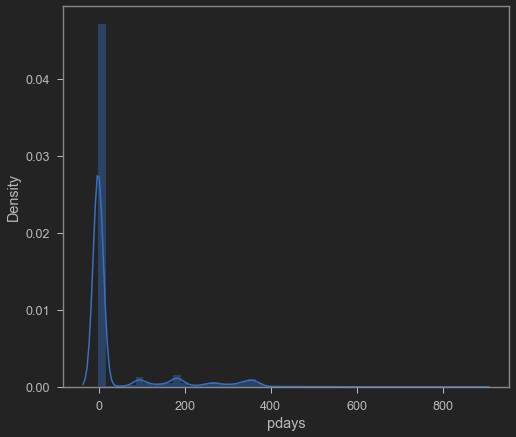

In [123]:
sns.distplot(df['pdays']);

In [174]:
df['pdays'].value_counts()

-1      36838
 182      166
 92       146
 91       126
 183      126
        ...  
 32         1
 551        1
 670        1
 65         1
 530        1
Name: pdays, Length: 558, dtype: int64

In [222]:
def pdays(x):
    if (x<=0):
        return 'Not.Previously.Contacted'
    elif (x>0 and x<=150):
        return '1-150 days'
    elif (x>150 and x<=300):
        return '151-300 days'
    else:
        return '>300 days'

In [223]:
df['pdays'] = df['pdays'].apply(pdays)

### Outliers Treatment

In [155]:
df.head()

age  age group eligible           job  salary  marital  education targeted  \
0   58          5        Y    management  100000  married   tertiary      yes   
1   44          4        Y    technician   60000   single  secondary      yes   
2   33          3        Y  entrepreneur  120000  married  secondary      yes   
3   47          4        Y   blue-collar   20000  married  secondary       no   
5   35          3        Y    management  100000  married   tertiary      yes   

  default  balance housing loan   contact  day month  duration  campaign  \
0      no     2143     yes   no  cellular    5   may       261         1   
1      no       29     yes   no  cellular    5   may       151         1   
2      no        2     yes  yes  cellular    5   may        76         1   
3      no     1506     yes   no  cellular    5   may        92         1   
5      no      231     yes   no  cellular    5   may       139         1   

                      pdays  previous  y  
0  Not.Previously.Contacted         0  0  
1  Not.Previously.Contacted         0  0  
2  Not.Previously.Contacted         0  0  
3  Not.Previously.Contacted         0  0  
5  Not.Previously.Contacted         0  0

In [156]:
df.shape

(45084, 20)

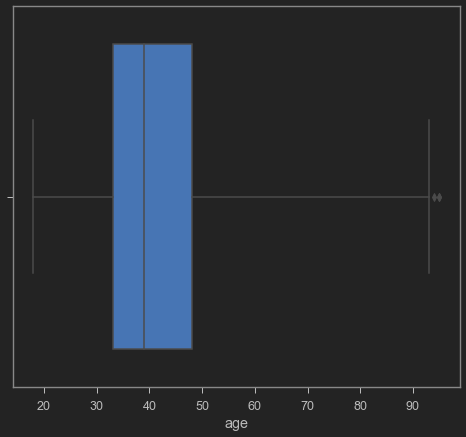

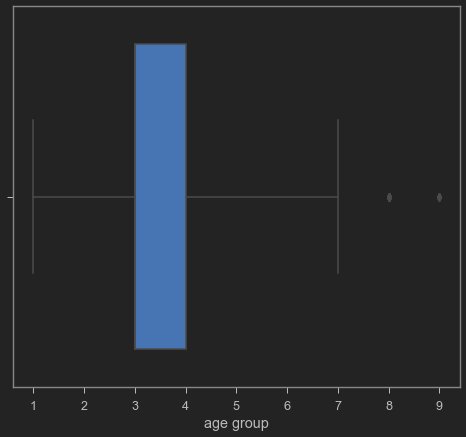

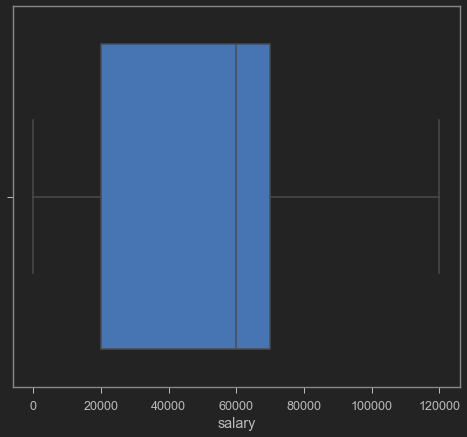

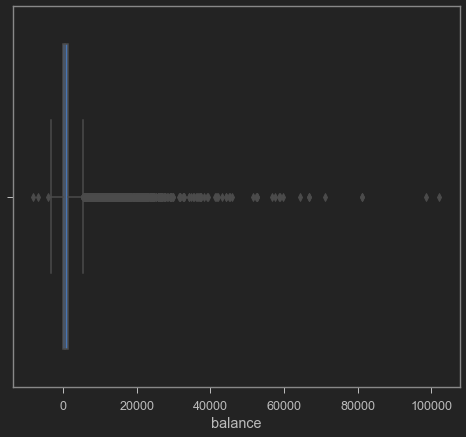

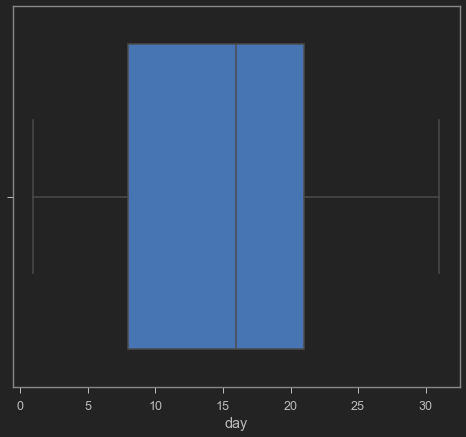

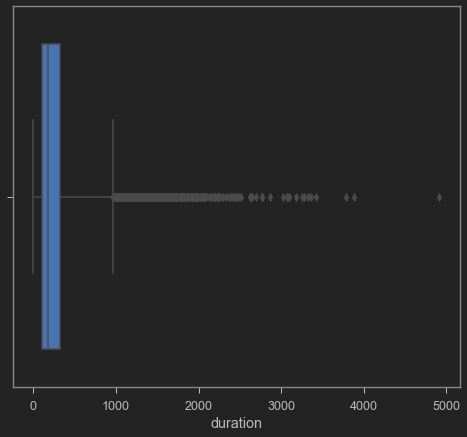

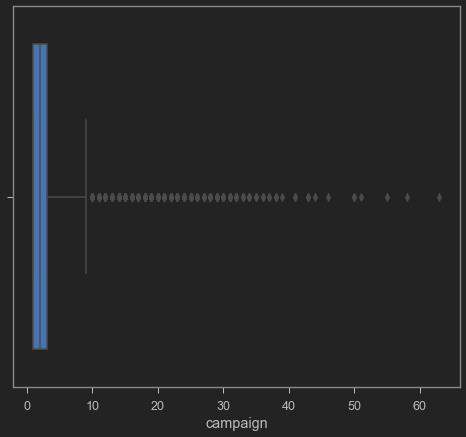

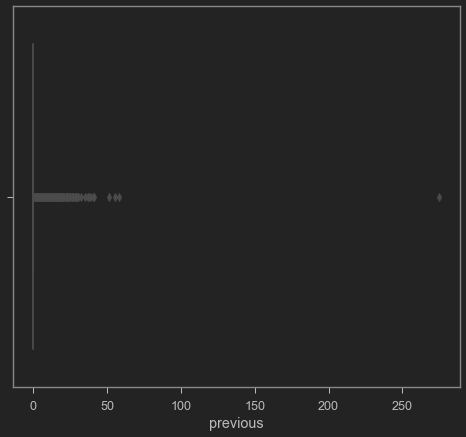

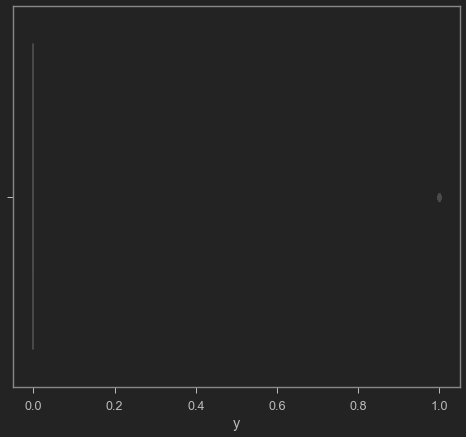

In [37]:
for i in df.select_dtypes(include=np.number).columns:
    sns.boxplot(df[i],whis=3)
    plt.show()

In [58]:
df['previous'].value_counts()

0      36838
1       2767
2       2103
3       1141
4        713
5        459
6        276
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
27         5
24         5
21         4
29         4
25         4
30         3
26         2
37         2
28         2
38         2
40         1
275        1
51         1
55         1
35         1
32         1
58         1
41         1
Name: previous, dtype: int64

In [224]:
ind = df[df['previous']>8].index
df.drop(index=ind,inplace=True)

In [225]:
df['previous'].value_counts()

0    36838
1     2767
2     2103
3     1141
4      713
5      459
6      276
7      205
8      129
Name: previous, dtype: int64

In [226]:
df.columns

Index(['age', 'age group', 'eligible', 'job', 'salary', 'marital', 'education',
       'targeted', 'default', 'balance', 'housing', 'loan', 'contact', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'y'],
      dtype='object')

In [227]:
num_out = ['salary','balance','duration','campaign']

In [228]:
for i in num_out:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    ll = q1 - (3*iqr)
    ul = q3 + (3*iqr)
    df[i] = df[(df[i]>=ll) & (df[i]<=ul)][i]

In [229]:
df.isnull().sum()/len(df)*100

age          0.000000
age group    0.000000
eligible     0.000000
job          0.000000
salary       0.000000
marital      0.000000
education    0.000000
targeted     0.000000
default      0.000000
balance      5.444646
housing      0.000000
loan         0.000000
contact      0.000000
day          0.000000
month        0.000000
duration     2.567722
campaign     3.246622
pdays        0.000000
previous     0.000000
y            0.000000
dtype: float64

In [230]:
df.dropna(inplace=True)

In [231]:
df.shape

(39771, 20)

### Statistical Tests

In [232]:
df.head()

age  age group eligible           job  salary  marital  education targeted  \
0   58          5        Y    management  100000  married   tertiary      yes   
1   44          4        Y    technician   60000   single  secondary      yes   
2   33          3        Y  entrepreneur  120000  married  secondary      yes   
3   47          4        Y   blue-collar   20000  married  secondary       no   
5   35          3        Y    management  100000  married   tertiary      yes   

  default  balance housing loan   contact  day month  duration  campaign  \
0      no   2143.0     yes   no  cellular    5   may     261.0       1.0   
1      no     29.0     yes   no  cellular    5   may     151.0       1.0   
2      no      2.0     yes  yes  cellular    5   may      76.0       1.0   
3      no   1506.0     yes   no  cellular    5   may      92.0       1.0   
5      no    231.0     yes   no  cellular    5   may     139.0       1.0   

                      pdays  previous  y  
0  Not.Previously.Contacted         0  0  
1  Not.Previously.Contacted         0  0  
2  Not.Previously.Contacted         0  0  
3  Not.Previously.Contacted         0  0  
5  Not.Previously.Contacted         0  0

In [233]:
df.columns

Index(['age', 'age group', 'eligible', 'job', 'salary', 'marital', 'education',
       'targeted', 'default', 'balance', 'housing', 'loan', 'contact', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'y'],
      dtype='object')

In [234]:
num_col = ['age', 'salary', 'balance', 'duration', 'campaign', 'previous']
cat_col = ['loan','job','default','day','month','age group','housing','marital','pdays','contact',
           'targeted','education','eligible']

In [187]:
num_col

['age', 'salary', 'balance', 'duration', 'campaign', 'previous']

In [188]:
cat_col

['loan',
 'job',
 'default',
 'day',
 'month',
 'age group',
 'housing',
 'marital',
 'pdays',
 'contact',
 'targeted',
 'education',
 'eligible']

In [236]:
# Chi-sqr Test of Independence
# Hypothesis Formation
# Ho : Variables are Independant (NO relation)
# Ha : Variables are Not independant (Relation)

def chi(obs):
    chi_stat,pval,df,exp_tab = stats.chi2_contingency(obs)
    return pval

not_sig_features = []
sig_features = []

for i in cat_col:
    obs = pd.crosstab(df[i],df['y'])
    pval = chi(obs)
    if (pval > 0.05):
        not_sig_features.append(i)   # Accept H0
    else:
        sig_features.append(i)       # Reject Ho

In [238]:
not_sig_features

[]

In [239]:
sig_features

['loan',
 'job',
 'default',
 'day',
 'month',
 'age group',
 'housing',
 'marital',
 'pdays',
 'contact',
 'targeted',
 'education',
 'eligible']

In [242]:
for i in num_col:
    stat,pval = stats.shapiro(df[i])
    print(i,':',pval)

age : 0.0
salary : 0.0
balance : 0.0
duration : 0.0
campaign : 0.0
previous : 0.0


### Encoding

In [165]:
df.head()

age  age group eligible           job  salary  marital  education targeted  \
0   58          5        Y    management  100000  married   tertiary      yes   
1   44          4        Y    technician   60000   single  secondary      yes   
2   33          3        Y  entrepreneur  120000  married  secondary      yes   
3   47          4        Y   blue-collar   20000  married  secondary       no   
5   35          3        Y    management  100000  married   tertiary      yes   

  default  balance housing loan   contact  day month  duration  campaign  \
0      no   2143.0     yes   no  cellular    5   may     261.0       1.0   
1      no     29.0     yes   no  cellular    5   may     151.0       1.0   
2      no      2.0     yes  yes  cellular    5   may      76.0       1.0   
3      no   1506.0     yes   no  cellular    5   may      92.0       1.0   
5      no    231.0     yes   no  cellular    5   may     139.0       1.0   

                      pdays  previous  y  
0  Not.Previously.Contacted         0  0  
1  Not.Previously.Contacted         0  0  
2  Not.Previously.Contacted         0  0  
3  Not.Previously.Contacted         0  0  
5  Not.Previously.Contacted         0  0

In [166]:
df['month'].replace({'may':5,'jun':6,'jul':7,'aug':8,'oct':10,'nov':11,'dec':12,'jan':1,'feb':2,'mar':3,
                     'apr':4,'sep':9},inplace=True)

In [167]:
cat_le = ['eligible','job','marital','education','targeted','default','housing',
          'loan','contact','pdays']

In [168]:
df[cat_le].head()

eligible           job  marital  education targeted default housing loan  \
0        Y    management  married   tertiary      yes      no     yes   no   
1        Y    technician   single  secondary      yes      no     yes   no   
2        Y  entrepreneur  married  secondary      yes      no     yes  yes   
3        Y   blue-collar  married  secondary       no      no     yes   no   
5        Y    management  married   tertiary      yes      no     yes   no   

    contact                     pdays  
0  cellular  Not.Previously.Contacted  
1  cellular  Not.Previously.Contacted  
2  cellular  Not.Previously.Contacted  
3  cellular  Not.Previously.Contacted  
5  cellular  Not.Previously.Contacted

In [169]:
for i in cat_le:
    print(i,'',df[i].unique())
    print()

eligible  ['Y' 'N']

job  ['management' 'technician' 'entrepreneur' 'blue-collar' 'retired' 'admin.'
 'services' 'self-employed' 'unemployed' 'housemaid' 'student']

marital  ['married' 'single' 'divorced']

education  ['tertiary' 'secondary' 'primary']

targeted  ['yes' 'no']

default  ['no' 'yes']

housing  ['yes' 'no']

loan  ['no' 'yes']

contact  ['cellular' 'telephone']

pdays  ['Not.Previously.Contacted' '151-300 days' '1-150 days' '>300 days']



In [170]:
le = LabelEncoder()

In [171]:
for i in cat_le:
    df[i] = le.fit_transform(df[i])

In [172]:
df.dtypes

age            int64
age group      int64
eligible       int32
job            int32
salary         int64
marital        int32
education      int32
targeted       int32
default        int32
balance      float64
housing        int32
loan           int32
contact        int32
day            int64
month          int64
duration     float64
campaign     float64
pdays          int32
previous       int64
y              int64
dtype: object

In [173]:
df.drop('age',1,inplace=True)

In [174]:
df.head()

age group  eligible  job  salary  marital  education  targeted  default  \
0          5         1    4  100000        1          2         1        0   
1          4         1    9   60000        2          1         1        0   
2          3         1    2  120000        1          1         1        0   
3          4         1    1   20000        1          1         0        0   
5          3         1    4  100000        1          2         1        0   

   balance  housing  loan  contact  day  month  duration  campaign  pdays  \
0   2143.0        1     0        0    5      5     261.0       1.0      3   
1     29.0        1     0        0    5      5     151.0       1.0      3   
2      2.0        1     1        0    5      5      76.0       1.0      3   
3   1506.0        1     0        0    5      5      92.0       1.0      3   
5    231.0        1     0        0    5      5     139.0       1.0      3   

   previous  y  
0         0  0  
1         0  0  
2         0  0  
3         0  0  
5         0  0

### Handling Imbalanced Data

In [175]:
df['y'].value_counts()

0    35650
1     4121
Name: y, dtype: int64

In [176]:
df['y'].value_counts(normalize=True)*100

0    89.638179
1    10.361821
Name: y, dtype: float64

In [177]:
x = df.drop('y',1)
y = df['y']

In [178]:
smote = SMOTE(sampling_strategy=0.5,random_state=10)
x_sm,y_sm = smote.fit_resample(x,y)

In [179]:
df_sm = pd.DataFrame(x_sm,columns=x.columns)
df_sm['y']=y_sm
df_sm.head()

age group  eligible  job  salary  marital  education  targeted  default  \
0          5         1    4  100000        1          2         1        0   
1          4         1    9   60000        2          1         1        0   
2          3         1    2  120000        1          1         1        0   
3          4         1    1   20000        1          1         0        0   
4          3         1    4  100000        1          2         1        0   

   balance  housing  loan  contact  day  month  duration  campaign  pdays  \
0   2143.0        1     0        0    5      5     261.0       1.0      3   
1     29.0        1     0        0    5      5     151.0       1.0      3   
2      2.0        1     1        0    5      5      76.0       1.0      3   
3   1506.0        1     0        0    5      5      92.0       1.0      3   
4    231.0        1     0        0    5      5     139.0       1.0      3   

   previous  y  
0         0  0  
1         0  0  
2         0  0  
3         0  0  
4         0  0

In [180]:
df_sm['y'].value_counts()

0    35650
1    17825
Name: y, dtype: int64

In [181]:
df_sm['y'].value_counts(normalize=True)*100

0    66.666667
1    33.333333
Name: y, dtype: float64

In [182]:
df.to_csv('Capstone_df.csv')
df_sm.to_csv('Capstone_df_sm.csv')

In [183]:
df.head()

age group  eligible  job  salary  marital  education  targeted  default  \
0          5         1    4  100000        1          2         1        0   
1          4         1    9   60000        2          1         1        0   
2          3         1    2  120000        1          1         1        0   
3          4         1    1   20000        1          1         0        0   
5          3         1    4  100000        1          2         1        0   

   balance  housing  loan  contact  day  month  duration  campaign  pdays  \
0   2143.0        1     0        0    5      5     261.0       1.0      3   
1     29.0        1     0        0    5      5     151.0       1.0      3   
2      2.0        1     1        0    5      5      76.0       1.0      3   
3   1506.0        1     0        0    5      5      92.0       1.0      3   
5    231.0        1     0        0    5      5     139.0       1.0      3   

   previous  y  
0         0  0  
1         0  0  
2         0  0  
3         0  0  
5         0  0

In [184]:
df_sm.head()

age group  eligible  job  salary  marital  education  targeted  default  \
0          5         1    4  100000        1          2         1        0   
1          4         1    9   60000        2          1         1        0   
2          3         1    2  120000        1          1         1        0   
3          4         1    1   20000        1          1         0        0   
4          3         1    4  100000        1          2         1        0   

   balance  housing  loan  contact  day  month  duration  campaign  pdays  \
0   2143.0        1     0        0    5      5     261.0       1.0      3   
1     29.0        1     0        0    5      5     151.0       1.0      3   
2      2.0        1     1        0    5      5      76.0       1.0      3   
3   1506.0        1     0        0    5      5      92.0       1.0      3   
4    231.0        1     0        0    5      5     139.0       1.0      3   

   previous  y  
0         0  0  
1         0  0  
2         0  0  
3         0  0  
4         0  0

# Assumptions

# For Logistic Regression

## From GL Pdf
### Assumption 1
Independence of error, whereby all sample group outcomes are
separate from each other (i.e., there are no duplicate responses)
### Assumption 2
Linearity in the logit for any continuous independent variables
### Assumption 3
Absence of multicollinearity
### Assumption 4
lack of strongly influential outliers

## From Internet
### Assumption 1: Appropriate dependent variable structure
This assumption simply states that a binary logistic regression requires your dependent variable to be dichotomous and an ordinal logistic regression requires it to be ordinal.
In addition, the dependent variable should neither be an interval nor ratio scale.
### Assumption 2: There is a linear relationship between the logit of the outcome and each independent variable.
The logit function is given by:
logit(p) = log(p/(1-p)), where p is the probability of an outcome
To check this assumption, you can do it visually by plotting each independent variable and the logit values on a scatterplot.The Y axes are the independent variables while the X axis shows the logit values. Then look at the equation of the curve to see if it meets the linearity assumption.
Remember that linearity is in the parameters. As long as the equation meets the linear equation form stated above, it meets the linearity assumption.
### Assumption 3: No Multicollinearity
As with the assumption for OLS regression, the same can be said here.
### Assumption 4: No Influential Outliers
Influential outliers are extreme data points that affect the quality of the logistic regression model.
Not all outliers are influential.
You will need to check for which points are the influential ones before removing or transforming them for analysis.
To check for outliers, you can run Cook’s Distance on the data values. A high Cook’s Distance value indicates outliers.
A rule of thumb for flagging out an influential outlier is when Cook’s Distance > 1.
### Assumption 5: Observation Independence
This assumption requires logistic regression observations to be independent of each other.
That is, observations should not come from a repeated measure design.
A repeated measure design refers to multiple measures of the same variable taken for the same person under different experimental conditions or across time.
A good example of repeated measures is longitudinal studies — tracking progress of a subject over years.

# For KNN
### Assumptions in KNN
Before using KNN, let us revisit some of the assumptions in KNN.

KNN assumes that the data is in a feature space. More exactly, the data points are in a metric space. The data can be scalars or possibly even multidimensional vectors. Since the points are in feature space, they have a notion of distance – This need not necessarily be Euclidean distance although it is the one commonly used.

Each of the training data consists of a set of vectors and class label associated with each vector. In the simplest case , it will be either + or – (for positive or negative classes). But KNN , can work equally well with arbitrary number of classes.

We are also given a single number "k" . This number decides how many neighbors (where neighbors is defined based on the distance metric) influence the classification. This is usually a odd number if the number of classes is 2. If k=1 , then the algorithm is simply called the nearest neighbor algorithm.

# For Naive Bayes
It is a classification technique based on Bayes' Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

# For Tree-based Models
For tree-based models such as Decision Trees, Random Forest & Gradient Boosting there are no model assumptions to validate.
Unlike OLS regression or logistic regression, tree-based models are robust to outliers and do not require the dependent variables to meet any normality assumptions.

In [4]:
df = pd.read_csv('Capstone_df.csv')
df_sm = pd.read_csv('Capstone_df_sm.csv')

In [5]:
df.head()

Unnamed: 0  age group  eligible  job  salary  marital  education  targeted  \
0           0          5         1    4  100000        1          2         1   
1           1          4         1    9   60000        2          1         1   
2           2          3         1    2  120000        1          1         1   
3           3          4         1    1   20000        1          1         0   
4           5          3         1    4  100000        1          2         1   

   default  balance  housing  loan  contact  day  month  duration  campaign  \
0        0   2143.0        1     0        0    5      5     261.0       1.0   
1        0     29.0        1     0        0    5      5     151.0       1.0   
2        0      2.0        1     1        0    5      5      76.0       1.0   
3        0   1506.0        1     0        0    5      5      92.0       1.0   
4        0    231.0        1     0        0    5      5     139.0       1.0   

   pdays  previous  y  
0      3         0  0  
1      3         0  0  
2      3         0  0  
3      3         0  0  
4      3         0  0

In [6]:
df_sm.head()

Unnamed: 0  age group  eligible  job  salary  marital  education  targeted  \
0           0          5         1    4  100000        1          2         1   
1           1          4         1    9   60000        2          1         1   
2           2          3         1    2  120000        1          1         1   
3           3          4         1    1   20000        1          1         0   
4           4          3         1    4  100000        1          2         1   

   default  balance  housing  loan  contact  day  month  duration  campaign  \
0        0   2143.0        1     0        0    5      5     261.0       1.0   
1        0     29.0        1     0        0    5      5     151.0       1.0   
2        0      2.0        1     1        0    5      5      76.0       1.0   
3        0   1506.0        1     0        0    5      5      92.0       1.0   
4        0    231.0        1     0        0    5      5     139.0       1.0   

   pdays  previous  y  
0      3         0  0  
1      3         0  0  
2      3         0  0  
3      3         0  0  
4      3         0  0

In [7]:
df.drop('Unnamed: 0',1,inplace=True)
df_sm.drop('Unnamed: 0',1,inplace=True)

In [8]:
df.head()

age group  eligible  job  salary  marital  education  targeted  default  \
0          5         1    4  100000        1          2         1        0   
1          4         1    9   60000        2          1         1        0   
2          3         1    2  120000        1          1         1        0   
3          4         1    1   20000        1          1         0        0   
4          3         1    4  100000        1          2         1        0   

   balance  housing  loan  contact  day  month  duration  campaign  pdays  \
0   2143.0        1     0        0    5      5     261.0       1.0      3   
1     29.0        1     0        0    5      5     151.0       1.0      3   
2      2.0        1     1        0    5      5      76.0       1.0      3   
3   1506.0        1     0        0    5      5      92.0       1.0      3   
4    231.0        1     0        0    5      5     139.0       1.0      3   

   previous  y  
0         0  0  
1         0  0  
2         0  0  
3         0  0  
4         0  0

In [9]:
df_sm.head()

age group  eligible  job  salary  marital  education  targeted  default  \
0          5         1    4  100000        1          2         1        0   
1          4         1    9   60000        2          1         1        0   
2          3         1    2  120000        1          1         1        0   
3          4         1    1   20000        1          1         0        0   
4          3         1    4  100000        1          2         1        0   

   balance  housing  loan  contact  day  month  duration  campaign  pdays  \
0   2143.0        1     0        0    5      5     261.0       1.0      3   
1     29.0        1     0        0    5      5     151.0       1.0      3   
2      2.0        1     1        0    5      5      76.0       1.0      3   
3   1506.0        1     0        0    5      5      92.0       1.0      3   
4    231.0        1     0        0    5      5     139.0       1.0      3   

   previous  y  
0         0  0  
1         0  0  
2         0  0  
3         0  0  
4         0  0

In [218]:
df['y'].value_counts(normalize=True)*100

0    89.638179
1    10.361821
Name: y, dtype: float64

In [219]:
df_sm['y'].value_counts(normalize=True)*100

0    66.666667
1    33.333333
Name: y, dtype: float64

# Splitting

In [10]:
x = df.drop('y',1)
y = df['y']

x_sm = df_sm.drop('y',1)
y_sm = df_sm['y']

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

x_sm_train,x_sm_test,y_sm_train,y_sm_test = train_test_split(x_sm,y_sm,test_size=0.3,random_state=10)

# Scaling

In [12]:
ss = StandardScaler()

In [13]:
sc = ['salary','balance','duration','campaign','previous']

In [14]:
# Only used for Cross Validation Score

x_scaled = x.copy(deep=True)
x_sm_scaled = x_sm.copy(deep=True)

x_scaled[sc] = ss.fit_transform(x_scaled[sc])
x_sm_scaled[sc] = ss.fit_transform(x_sm_scaled[sc])

In [15]:
# For Model Building

x_train[sc] = ss.fit_transform(x_train[sc])
x_test[sc] = ss.fit_transform(x_test[sc])

x_sm_train[sc] = ss.fit_transform(x_sm_train[sc])
x_sm_test[sc] = ss.fit_transform(x_sm_test[sc])

# 1) Logistic Regression:

### Base Model (without SMOTE)

In [11]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [12]:
y_test_pred = log_reg.predict(x_test)

In [13]:
y_test_prob_1 = log_reg.predict_proba(x_test)[:,1]

In [229]:
cm = confusion_matrix(y_test,y_test_pred)

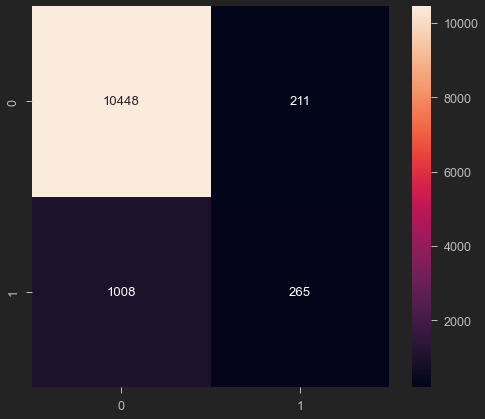

In [230]:
sns.heatmap(cm,annot=True,fmt='.0f');

In [231]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10659
           1       0.56      0.21      0.30      1273

    accuracy                           0.90     11932
   macro avg       0.73      0.59      0.62     11932
weighted avg       0.87      0.90      0.88     11932



In [232]:
fpr, tpr, threshold = roc_curve(y_test,y_test_prob_1)
roc_df = pd.DataFrame([fpr,tpr,threshold],index=['FPR','TPR','Threshold']).T

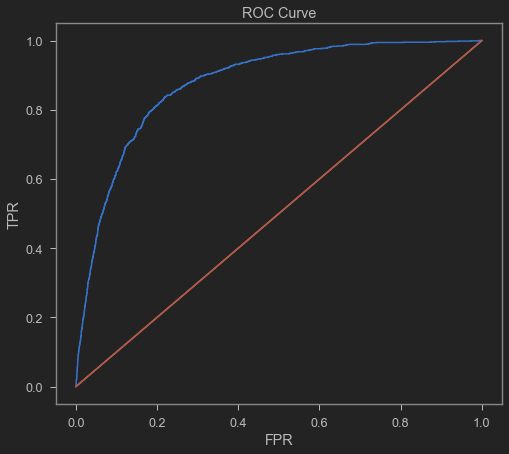

In [233]:
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC Curve')
plt.show()

In [234]:
roc_auc_score(y_test,y_test_prob_1)

0.8775605875992813

### For Cross Validation

In [14]:
k = KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(estimator=log_reg,X=x_scaled,y=y,cv=k,scoring='recall')
np.mean(scores)

0.22480666363680252

In [15]:
recall_log_reg_without_SMOTE = scores

In [16]:
k = KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(estimator=log_reg,X=x_scaled,y=y,cv=k,scoring='f1_weighted')
np.mean(scores)

0.8821434050479958

In [17]:
f1_weighted_log_reg_without_SMOTE = scores

In [18]:
k = KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(estimator=log_reg,X=x_scaled,y=y,cv=k,scoring='roc_auc')
scores

array([0.88151631, 0.8670108 , 0.8755288 , 0.86382746, 0.87610389])

In [19]:
roc_auc_log_reg_without_SMOTE = scores

In [238]:
roc_auc = np.mean(scores)
roc_auc

0.8727974537855001

In [239]:
bias_error = 1 - np.mean(scores)
bias_error

0.1272025462144999

In [240]:
variance_error = np.std(scores,ddof=1) / np.abs(np.mean(scores))
variance_error

0.008269152063523398

### Base Model (with SMOTE)

### Using Logit Function

In [16]:
x_sm_scaled_const = sm.add_constant(x_sm_scaled)
logit_model = sm.Logit(y_sm,x_sm_scaled_const).fit()

Optimization terminated successfully.
         Current function value: 0.320934
         Iterations 7


In [17]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                53475
Model:                          Logit   Df Residuals:                    53456
Method:                           MLE   Df Model:                           18
Date:                Wed, 08 Sep 2021   Pseudo R-squ.:                  0.4958
Time:                        11:41:33   Log-Likelihood:                -17162.
converged:                       True   LL-Null:                       -34038.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.3520      0.152     68.100      0.000      10.054      10.650
age group     -0.7452      0.017    -43.193      0.000      -0.779      -0.711
eligible      -2.9378      0.069    -42.477      0.000      -3.073      -2.802
job            0.0017      0.004      0.396      0.692      -0.007       0.010
salary         0.1249      0.017      7.511      0.000       0.092       0.158
marital       -0.6788      0.025    -27.368      0.000      -0.727      -0.630
education     -0.4039      0.028    -14.199      0.000      -0.460      -0.348
targeted      -1.0301      0.036    -28.661      0.000      -1.101      -0.960
default       -0.8751      0.162     -5.399      0.000      -1.193      -0.557
balance        0.1820      0.014     13.328      0.000       0.155       0.209
housing       -1.9186      0.031    -61.090      0.000      -1.980      -1.857
loan          -1.6478      0.060    -27.572      0.000      -1.765      -1.531
contact       -0.9045      0.079    -11.476      0.000      -1.059      -0.750
day           -0.0124      0.002     -7.161      0.000      -0.016      -0.009
month         -0.0483      0.006     -8.636      0.000      -0.059      -0.037
duration       1.3568      0.016     87.224      0.000       1.326       1.387
campaign      -0.2473      0.016    -15.293      0.000      -0.279      -0.216
pdays         -1.0841      0.021    -52.871      0.000      -1.124      -1.044
previous      -0.2557      0.019    -13.578      0.000      -0.293      -0.219
==============================================================================
"""

### Using Sklearn

In [22]:
log_reg = LogisticRegression()
log_reg.fit(x_sm_train,y_sm_train)

LogisticRegression()

In [242]:
y_sm_test_pred = log_reg.predict(x_sm_test)

In [243]:
y_sm_test_prob_1 = log_reg.predict_proba(x_sm_test)[:,1]

In [244]:
cm = confusion_matrix(y_sm_test,y_sm_test_pred)

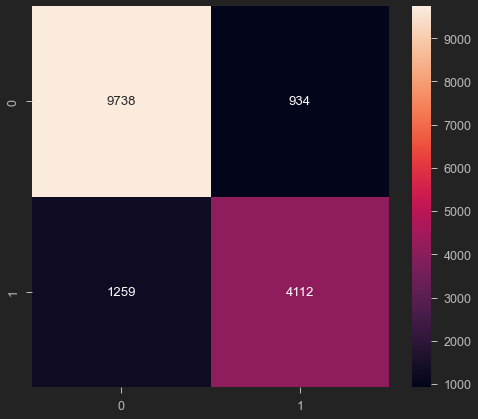

In [245]:
sns.heatmap(cm,annot=True,fmt='.0f');

In [246]:
print(classification_report(y_sm_test,y_sm_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90     10672
           1       0.81      0.77      0.79      5371

    accuracy                           0.86     16043
   macro avg       0.85      0.84      0.84     16043
weighted avg       0.86      0.86      0.86     16043



In [247]:
fpr, tpr, threshold = roc_curve(y_sm_test,y_sm_test_prob_1)
roc_df = pd.DataFrame([fpr,tpr,threshold],index=['FPR','TPR','Threshold']).T

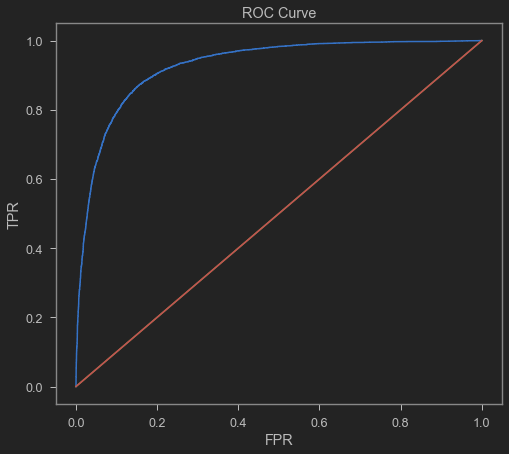

In [248]:
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC Curve')
plt.show()

In [249]:
roc_auc_score(y_sm_test,y_sm_test_prob_1)

0.9282776632071228

### For Cross Validation

In [23]:
k = KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(estimator=log_reg,X=x_sm_scaled,y=y_sm,cv=k,scoring='recall')
np.mean(scores)

0.7629546020167368

In [25]:
recall_log_reg_with_SMOTE = scores

In [26]:
k = KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(estimator=log_reg,X=x_sm_scaled,y=y_sm,cv=k,scoring='f1_weighted')
np.mean(scores)

0.8639276781930787

In [27]:
f1_weighted_log_reg_with_SMOTE = scores

In [28]:
k = KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(estimator=log_reg,X=x_sm_scaled,y=y_sm,cv=k,scoring='roc_auc')
np.mean(scores)

0.9280381365050898

In [29]:
roc_auc_log_reg_with_SMOTE = scores

In [253]:
bias_error = 1 - np.mean(scores)
bias_error

0.07196186349491018

In [254]:
variance_error = np.std(scores,ddof=1) / np.abs(np.mean(scores))
variance_error

0.003267601739925746

# 2) KNN Classifier:

### Base Model (with SMOTE)

In [30]:
knn = KNeighborsClassifier()
knn.fit(x_sm_train,y_sm_train)

KNeighborsClassifier()

In [309]:
y_sm_test_pred = knn.predict(x_sm_test)

In [310]:
y_sm_test_prob_1 = knn.predict_proba(x_sm_test)[:,1]

In [311]:
cm = confusion_matrix(y_sm_test,y_sm_test_pred)

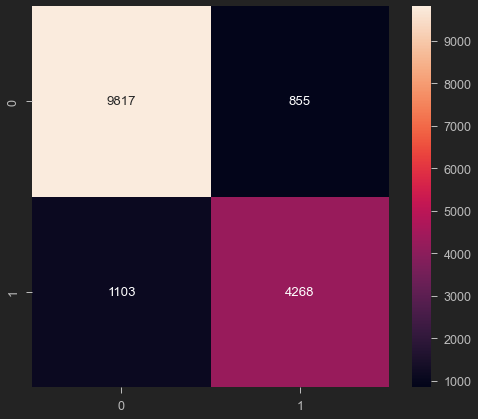

In [312]:
sns.heatmap(cm,annot=True,fmt='.0f');

In [313]:
print(classification_report(y_sm_test,y_sm_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91     10672
           1       0.83      0.79      0.81      5371

    accuracy                           0.88     16043
   macro avg       0.87      0.86      0.86     16043
weighted avg       0.88      0.88      0.88     16043



In [263]:
fpr, tpr, threshold = roc_curve(y_sm_test,y_sm_test_prob_1)
roc_df = pd.DataFrame([fpr,tpr,threshold],index=['FPR','TPR','Threshold']).T

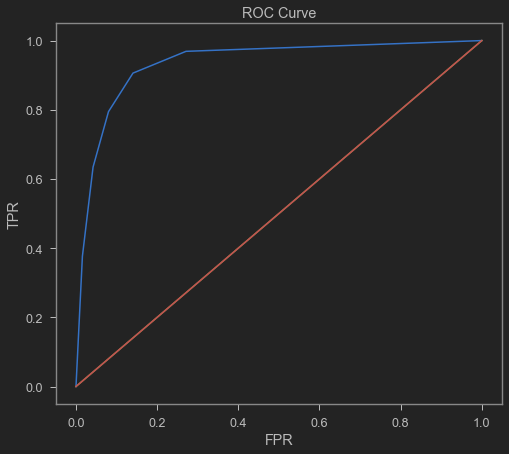

In [264]:
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC Curve')
plt.show()

In [265]:
roc_auc_score(y_sm_test,y_sm_test_prob_1)

0.9347773312422173

### For Cross Validation

In [31]:
k = KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(estimator=knn,X=x_sm_scaled,y=y_sm,cv=k,scoring='recall')
np.mean(scores)

0.805349874947183

In [32]:
recall_knn = scores

In [33]:
k = KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(estimator=knn,X=x_sm_scaled,y=y_sm,cv=k,scoring='f1_weighted')
np.mean(scores)

0.8795099135955329

In [34]:
f1_weighted_knn = scores

In [35]:
k = KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(estimator=knn,X=x_sm_scaled,y=y_sm,cv=k,scoring='roc_auc')
np.mean(scores)

0.935847778382807

In [36]:
roc_auc_knn = scores

In [269]:
bias_error = 1 - np.mean(scores)
bias_error

0.06415222161719303

In [270]:
variance_error = np.std(scores,ddof=1) / np.abs(np.mean(scores))
variance_error

0.0022956312416322275

# 3) Random Forest:

### Base Model

In [272]:
rf = RandomForestClassifier(random_state=10)
params = {'max_depth':np.arange(1,18)}

k = KFold(n_splits=5,shuffle=True,random_state=10)
grid_cv = GridSearchCV(estimator=rf,param_grid=params,cv=k,scoring='roc_auc')
grid_cv.fit(x_sm_train,y_sm_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=RandomForestClassifier(random_state=10),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])},
             scoring='roc_auc')

In [273]:
grid_cv.best_params_

{'max_depth': 17}

In [37]:
rf = RandomForestClassifier(max_depth=17,random_state=10)
rf.fit(x_sm_train,y_sm_train)

RandomForestClassifier(max_depth=17, random_state=10)

In [275]:
y_sm_test_pred = rf.predict(x_sm_test)

In [276]:
y_sm_test_prob_1 = rf.predict_proba(x_sm_test)[:,1]

In [277]:
cm = confusion_matrix(y_sm_test,y_sm_test_pred)

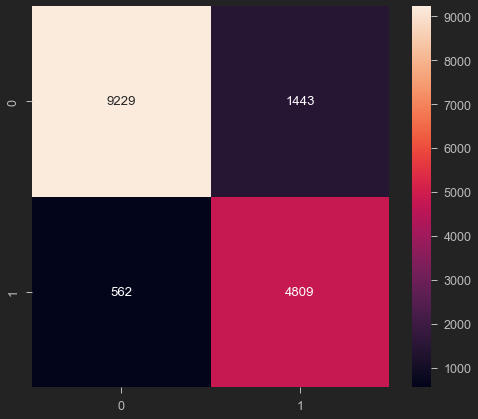

In [278]:
sns.heatmap(cm,annot=True,fmt='.0f');

In [279]:
print(classification_report(y_sm_test,y_sm_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90     10672
           1       0.77      0.90      0.83      5371

    accuracy                           0.88     16043
   macro avg       0.86      0.88      0.86     16043
weighted avg       0.88      0.88      0.88     16043



In [280]:
fpr, tpr, threshold = roc_curve(y_sm_test,y_sm_test_prob_1)
roc_df = pd.DataFrame([fpr,tpr,threshold],index=['FPR','TPR','Threshold']).T

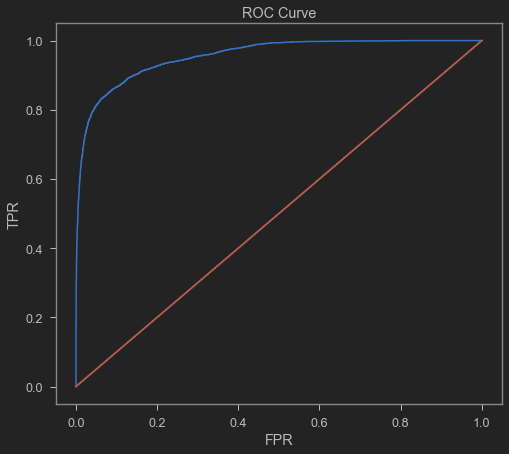

In [281]:
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC Curve')
plt.show()

In [282]:
roc_auc_score(y_sm_test,y_sm_test_prob_1)

0.955789246039799

### For Cross Validation

In [38]:
k = KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(estimator=rf,X=x_sm_scaled,y=y_sm,cv=k,scoring='recall')
np.mean(scores)

0.8732083171209322

In [39]:
recall_rf = scores

In [40]:
k = KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(estimator=rf,X=x_sm_scaled,y=y_sm,cv=k,scoring='f1_weighted')
np.mean(scores)

0.9227131337098042

In [41]:
f1_weighted_rf = scores

In [42]:
k = KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(estimator=rf,X=x_sm_scaled,y=y_sm,cv=k,scoring='roc_auc')
np.mean(scores)

0.9765261869799087

In [43]:
roc_auc_rf = scores

In [286]:
bias_error = 1 - np.mean(scores)
bias_error

0.023473813020091328

In [287]:
variance_error = np.std(scores,ddof=1) / np.abs(np.mean(scores))
variance_error

0.0015890676007121415

# 4) AdaBoosting:

In [44]:
ada = AdaBoostClassifier(n_estimators=100,random_state=10)
ada.fit(x_sm_train,y_sm_train)

AdaBoostClassifier(n_estimators=100, random_state=10)

In [289]:
y_sm_test_pred = ada.predict(x_sm_test)

In [290]:
y_sm_test_prob_1 = ada.predict_proba(x_sm_test)[:,1]

In [291]:
cm = confusion_matrix(y_sm_test,y_sm_test_pred)

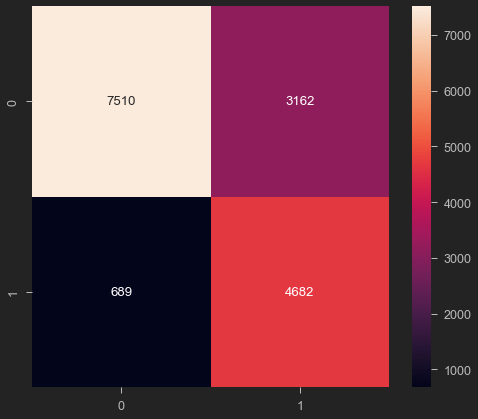

In [292]:
sns.heatmap(cm,annot=True,fmt='.0f');

In [293]:
print(classification_report(y_sm_test,y_sm_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.70      0.80     10672
           1       0.60      0.87      0.71      5371

    accuracy                           0.76     16043
   macro avg       0.76      0.79      0.75     16043
weighted avg       0.81      0.76      0.77     16043



In [294]:
fpr, tpr, threshold = roc_curve(y_sm_test,y_sm_test_prob_1)
roc_df = pd.DataFrame([fpr,tpr,threshold],index=['FPR','TPR','Threshold']).T

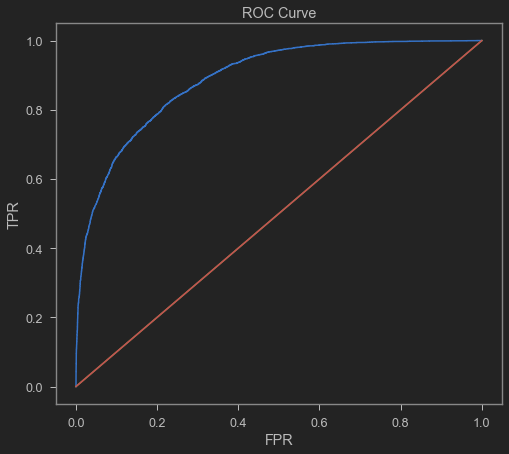

In [295]:
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC Curve')
plt.show()

In [296]:
roc_auc_score(y_sm_test,y_sm_test_prob_1)

0.8895903530733238

### For Cross Validation

In [45]:
k = KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(estimator=ada,X=x_sm_scaled,y=y_sm,cv=k,scoring='recall')
np.mean(scores)

0.8063216787856348

In [46]:
recall_ada = scores

In [47]:
k = KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(estimator=ada,X=x_sm_scaled,y=y_sm,cv=k,scoring='f1_weighted')
np.mean(scores)

0.8974935493437846

In [48]:
f1_weighted_ada = scores

In [49]:
k = KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(estimator=ada,X=x_sm_scaled,y=y_sm,cv=k,scoring='roc_auc')
np.mean(scores)

0.9588934110513598

In [50]:
roc_auc_ada = scores

In [300]:
bias_error = 1 - np.mean(scores)
bias_error

0.041106588948640166

In [301]:
variance_error = np.std(scores,ddof=1) / np.abs(np.mean(scores))
variance_error

0.002702253665434748

# 5) Gradient Boosting

In [51]:
gb = GradientBoostingClassifier(random_state=10)
gb.fit(x_sm_train,y_sm_train)

GradientBoostingClassifier(random_state=10)

In [316]:
y_sm_test_pred = gb.predict(x_sm_test)

In [317]:
y_sm_test_prob_1 = gb.predict_proba(x_sm_test)[:,1]

In [318]:
cm = confusion_matrix(y_sm_test,y_sm_test_pred)

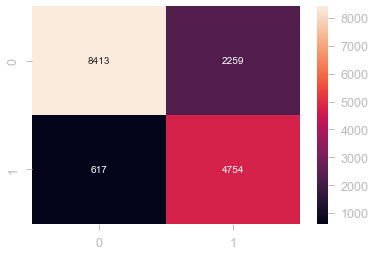

In [319]:
sns.heatmap(cm,annot=True,fmt='.0f');

In [321]:
print(classification_report(y_sm_test,y_sm_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.79      0.85     10672
           1       0.68      0.89      0.77      5371

    accuracy                           0.82     16043
   macro avg       0.80      0.84      0.81     16043
weighted avg       0.85      0.82      0.83     16043



In [322]:
fpr, tpr, threshold = roc_curve(y_sm_test,y_sm_test_prob_1)
roc_df = pd.DataFrame([fpr,tpr,threshold],index=['FPR','TPR','Threshold']).T

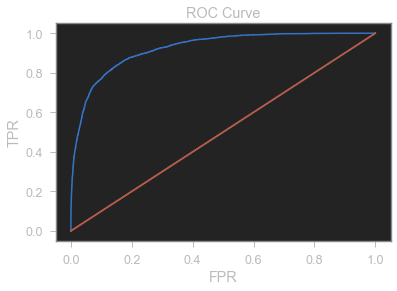

In [323]:
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC Curve')
plt.show()

In [324]:
roc_auc_score(y_sm_test,y_sm_test_prob_1)

0.923724494460087

### For Cross Validation

In [52]:
k = KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(estimator=gb,X=x_sm_scaled,y=y_sm,cv=k,scoring='recall')
np.mean(scores)

0.8245675097805618

In [53]:
recall_gb = scores

In [54]:
k = KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(estimator=gb,X=x_sm_scaled,y=y_sm,cv=k,scoring='f1_weighted')
np.mean(scores)

0.9058005456427616

In [55]:
f1_weighted_gb = scores

In [56]:
k = KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(estimator=gb,X=x_sm_scaled,y=y_sm,cv=k,scoring='roc_auc')
np.mean(scores)

0.9672048010317145

In [57]:
roc_auc_gb = scores

In [328]:
bias_error = 1 - np.mean(scores)
bias_error

0.03279519896828553

In [329]:
variance_error = np.std(scores,ddof=1) / np.abs(np.mean(scores))
variance_error

0.0017411761383945474

# 6) XGB

In [366]:
xgb = XGBClassifier(verbosity=0,random_state=100)
params = {'max_depth':np.arange(1,18)}

k = KFold(n_splits=5,shuffle=True,random_state=10)
grid_cv = GridSearchCV(estimator=xgb,param_grid=params,cv=k,scoring='roc_auc')
grid_cv.fit(x_sm_train,y_sm_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=100,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
        

In [367]:
grid_cv.best_params_

{'max_depth': 11}

In [11]:
xgb = XGBClassifier(max_depth=11,verbosity=0,random_state=100)
xgb.fit(x_sm_train,y_sm_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=11,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)

In [16]:
y_sm_test_pred = xgb.predict(x_sm_test)

In [17]:
y_sm_test_prob_1 = xgb.predict_proba(x_sm_test)[:,1]

In [18]:
cm = confusion_matrix(y_sm_test,y_sm_test_pred)

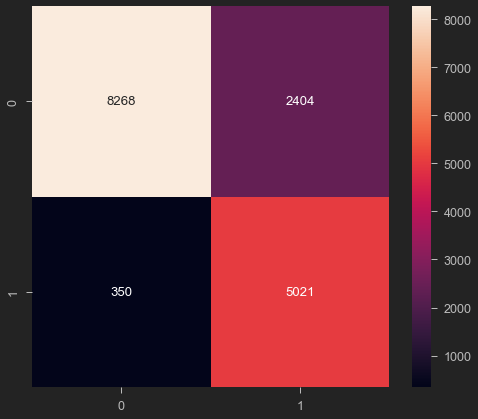

In [19]:
sns.heatmap(cm,annot=True,fmt='.0f');

In [20]:
print(classification_report(y_sm_test,y_sm_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.77      0.86     10672
           1       0.68      0.93      0.78      5371

    accuracy                           0.83     16043
   macro avg       0.82      0.85      0.82     16043
weighted avg       0.86      0.83      0.83     16043



In [374]:
fpr, tpr, threshold = roc_curve(y_sm_test,y_sm_test_prob_1)
roc_df = pd.DataFrame([fpr,tpr,threshold],index=['FPR','TPR','Threshold']).T

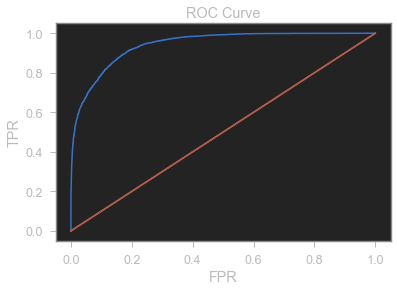

In [375]:
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC Curve')
plt.show()

In [376]:
roc_auc_score(y_sm_test,y_sm_test_prob_1)

0.941800609888688

### For Cross Validation

In [59]:
k = KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(estimator=xgb,X=x_sm_scaled,y=y_sm,cv=k,scoring='recall')
np.mean(scores)

0.8838237069078065

In [60]:
recall_xgb = scores

In [61]:
k = KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(estimator=xgb,X=x_sm_scaled,y=y_sm,cv=k,scoring='f1_weighted')
np.mean(scores)

0.9304946715348456

In [62]:
f1_weighted_xgb = scores

In [63]:
k = KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(estimator=xgb,X=x_sm_scaled,y=y_sm,cv=k,scoring='roc_auc')
np.mean(scores)

0.9806881226661595

In [64]:
roc_auc_xgb = scores

In [380]:
bias_error = 1 - np.mean(scores)
bias_error

0.019311877333840544

In [381]:
variance_error = np.std(scores,ddof=1) / np.abs(np.mean(scores))
variance_error

0.001063314256004787

# 7) Stacking Classifier:

In [65]:
rf = RandomForestClassifier(max_depth=17,random_state=10)
gb = GradientBoostingClassifier(random_state=10)

est = [('randomforest',rf),('gradientboost',gb)]

xgb = XGBClassifier(max_depth=11,verbosity=0,random_state=100)

In [66]:
k = KFold(n_splits=5,shuffle=True,random_state=10)
stack_cls  = StackingClassifier(estimators=est,final_estimator=xgb,cv=k)
stack_cls.fit(x_sm_train,y_sm_train)

StackingClassifier(cv=KFold(n_splits=5, random_state=10, shuffle=True),
                   estimators=[('randomforest',
                                RandomForestClassifier(max_depth=17,
                                                       random_state=10)),
                               ('gradientboost',
                                GradientBoostingClassifier(random_state=10))],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 gamma=None...
                                                 importance_type='gain',
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                            

In [395]:
y_sm_test_pred = stack_cls.predict(x_sm_test)

In [396]:
y_sm_test_prob_1 = stack_cls.predict_proba(x_sm_test)[:,1]

In [397]:
cm = confusion_matrix(y_sm_test,y_sm_test_pred)

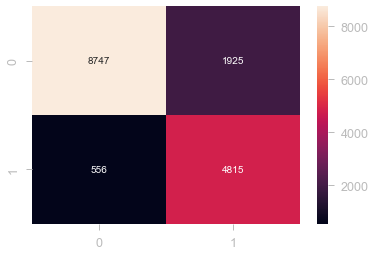

In [398]:
sns.heatmap(cm,annot=True,fmt='.0f');

In [399]:
print(classification_report(y_sm_test,y_sm_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.82      0.88     10672
           1       0.71      0.90      0.80      5371

    accuracy                           0.85     16043
   macro avg       0.83      0.86      0.84     16043
weighted avg       0.86      0.85      0.85     16043



In [400]:
fpr, tpr, threshold = roc_curve(y_sm_test,y_sm_test_prob_1)
roc_df = pd.DataFrame([fpr,tpr,threshold],index=['FPR','TPR','Threshold']).T

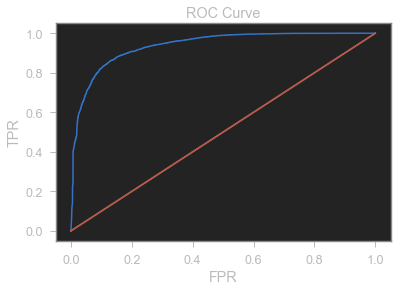

In [401]:
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC Curve')
plt.show()

In [402]:
roc_auc_score(y_sm_test,y_sm_test_prob_1)

0.937375425929746

### For Cross Validation

In [67]:
k = KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(estimator=stack_cls,X=x_sm_scaled,y=y_sm,cv=k,scoring='recall')
np.mean(scores)

0.8647953258025346

In [68]:
recall_stack_cls = scores

In [69]:
k = KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(estimator=stack_cls,X=x_sm_scaled,y=y_sm,cv=k,scoring='f1_weighted')
np.mean(scores)

0.9187920864840506

In [70]:
f1_weighted_stack_cls = scores

In [71]:
k = KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(estimator=stack_cls,X=x_sm_scaled,y=y_sm,cv=k,scoring='roc_auc')
np.mean(scores)

0.9744856718471085

In [72]:
roc_auc_stack_cls = scores

In [406]:
bias_error = 1 - np.mean(scores)
bias_error

0.025514328152891452

In [407]:
variance_error = np.std(scores,ddof=1) / np.abs(np.mean(scores))
variance_error

0.0016848213377639043

# 8) Voting Classifier:

In [73]:
rf = RandomForestClassifier(max_depth=17,random_state=10)
gb = GradientBoostingClassifier(random_state=10)
xgb = XGBClassifier(max_depth=11,verbosity=0,random_state=100)

est = [('XGB',xgb),('randomforest',rf),('gradientboost',gb)]

In [74]:
vc = VotingClassifier(estimators=est,voting='soft')
vc.fit(x_sm_train,y_sm_train)

VotingClassifier(estimators=[('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=11,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=100, reg_alpha=None,
    

In [412]:
y_sm_test_pred = vc.predict(x_sm_test)
y_sm_test_prob_1 = vc.predict_proba(x_sm_test)[:,1]

In [413]:
cm = confusion_matrix(y_sm_test,y_sm_test_pred)

In [414]:
print(classification_report(y_sm_test,y_sm_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.81      0.87     10672
           1       0.71      0.92      0.80      5371

    accuracy                           0.85     16043
   macro avg       0.83      0.86      0.84     16043
weighted avg       0.87      0.85      0.85     16043



In [415]:
fpr, tpr, threshold = roc_curve(y_sm_test,y_sm_test_prob_1)
roc_df = pd.DataFrame([fpr,tpr,threshold],index=['FPR','TPR','Threshold']).T

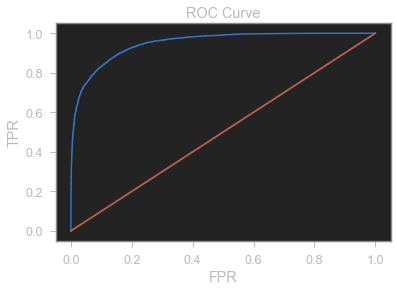

In [416]:
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC Curve')
plt.show()

In [417]:
roc_auc_score(y_sm_test,y_sm_test_prob_1)

0.9497765081339429

### For Cross Validation

In [75]:
k = KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(estimator=vc,X=x_sm_scaled,y=y_sm,cv=k,scoring='recall')
np.mean(scores)

0.8745623405085171

In [76]:
recall_vc = scores

In [77]:
k = KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(estimator=vc,X=x_sm_scaled,y=y_sm,cv=k,scoring='f1_weighted')
np.mean(scores)

0.9278016958954527

In [78]:
f1_weighted_vc = scores

In [79]:
k = KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(estimator=vc,X=x_sm_scaled,y=y_sm,cv=k,scoring='roc_auc')
np.mean(scores)

0.9791131070381978

In [80]:
roc_auc_vc = scores

In [421]:
bias_error = 1 - np.mean(scores)
bias_error

0.02088689296180224

In [422]:
variance_error = np.std(scores,ddof=1) / np.abs(np.mean(scores))
variance_error

0.0013168224179146149

# recall_score comparison

In [94]:
names = ['log_reg_without_SMOTE','log_reg_with_smote','knn','rf','ada','gb','xgb','stack_cls','vc']

In [103]:
results_recall_1 = pd.DataFrame()

results_recall_1['recall'] = recall_log_reg_without_SMOTE
results_recall_1['Models'] = 'log_reg_without_SMOTE'


results_recall_1.reset_index(drop=True,inplace=True)

In [104]:
results_recall_1

recall                 Models
0  0.221827  log_reg_without_SMOTE
1  0.203636  log_reg_without_SMOTE
2  0.210063  log_reg_without_SMOTE
3  0.241505  log_reg_without_SMOTE
4  0.247002  log_reg_without_SMOTE

In [106]:
results_recall_2 = pd.DataFrame()

results_recall_2['recall'] = recall_log_reg_with_SMOTE
results_recall_2['Models'] = 'log_reg_with_SMOTE'

results_recall_3 = pd.DataFrame()
results_recall_3['recall'] = recall_knn
results_recall_3['Models'] = 'knn'

results_recall_4 = pd.DataFrame()
results_recall_4['recall'] = recall_rf
results_recall_4['Models'] = 'rf'

results_recall_5 = pd.DataFrame()
results_recall_5['recall'] = recall_ada
results_recall_5['Models'] = 'ada'

results_recall_6 = pd.DataFrame()
results_recall_6['recall'] = recall_gb
results_recall_6['Models'] = 'gb'

results_recall_7 = pd.DataFrame()
results_recall_7['recall'] = recall_xgb
results_recall_7['Models'] = 'xgb'

results_recall_8 = pd.DataFrame()
results_recall_8['recall'] = recall_stack_cls
results_recall_8['Models'] = 'stack_cls'

results_recall_9 = pd.DataFrame()
results_recall_9['recall'] = recall_vc
results_recall_9['Models'] = 'vc'

In [108]:
results_box = pd.concat([results_recall_1,results_recall_2,results_recall_3,results_recall_4,
                        results_recall_5,results_recall_6,results_recall_7,results_recall_8,
                        results_recall_9])

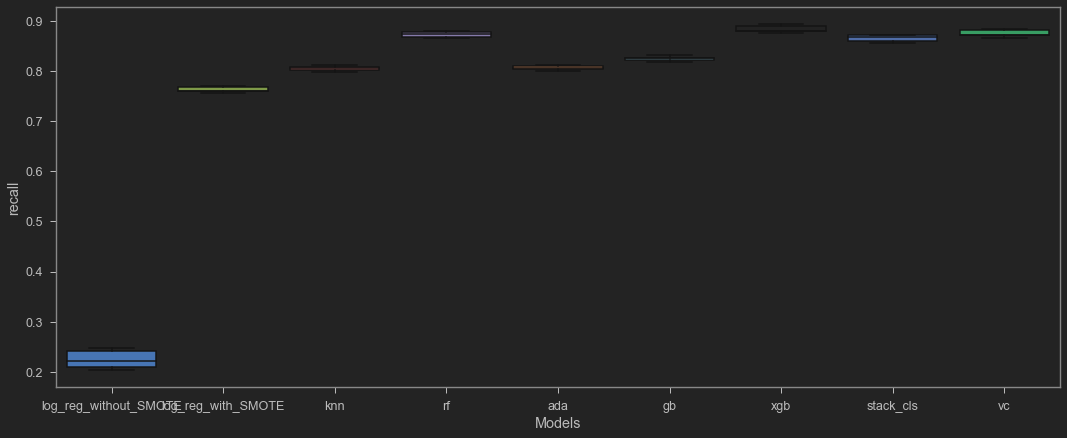

In [113]:
plt.figure(figsize=(18,7))
sns.boxplot(x=results_box['Models'],y=results_box['recall']);

# Overall Inference

In [3]:
results_df = pd.DataFrame()

In [4]:
results_df['recall_score'] = [0.22,0.76,0.81,0.87,0.81,0.82,0.88,0.86,0.87]
results_df['f1_weighted'] = [0.88,0.86,0.88,0.92,0.90,0.91,0.93,0.92,0.93]
results_df['roc_auc (%)'] = [87.28,92.80,93.58,97.65,95.89,96.72,98.07,97.45,97.91]
results_df['bias_error %(roc_auc)'] = [12.72,7.20,6.42,2.35,4.11,3.28,1.93,2.55,2.09]
results_df['variance_error %(roc_auc)'] = [0.83,0.33,0.23,0.16,0.27,0.17,0.11,0.17,0.13]

In [5]:
results_df.index = ['Logistic Regression (without SMOTE)','Logistic Regression (with SMOTE)',
                   'KNN Classifier','Randm Forest','AdaBoost','Gradient Boost',
                    'XGB','Stacking Classifier','Voting Classifier']

In [6]:
results_df

recall_score  f1_weighted  roc_auc (%)  \
Logistic Regression (without SMOTE)          0.22         0.88        87.28   
Logistic Regression (with SMOTE)             0.76         0.86        92.80   
KNN Classifier                               0.81         0.88        93.58   
Randm Forest                                 0.87         0.92        97.65   
AdaBoost                                     0.81         0.90        95.89   
Gradient Boost                               0.82         0.91        96.72   
XGB                                          0.88         0.93        98.07   
Stacking Classifier                          0.86         0.92        97.45   
Voting Classifier                            0.87         0.93        97.91   

                                     bias_error %(roc_auc)  \
Logistic Regression (without SMOTE)                  12.72   
Logistic Regression (with SMOTE)                      7.20   
KNN Classifier                                        6.42   
Randm Forest                                          2.35   
AdaBoost                                              4.11   
Gradient Boost                                        3.28   
XGB                                                   1.93   
Stacking Classifier                                   2.55   
Voting Classifier                                     2.09   

                                     variance_error %(roc_auc)  
Logistic Regression (without SMOTE)                       0.83  
Logistic Regression (with SMOTE)                          0.33  
KNN Classifier                                            0.23  
Randm Forest                                              0.16  
AdaBoost                                                  0.27  
Gradient Boost                                            0.17  
XGB                                                       0.11  
Stacking Classifier                                       0.17  
Voting Classifier                                         0.13

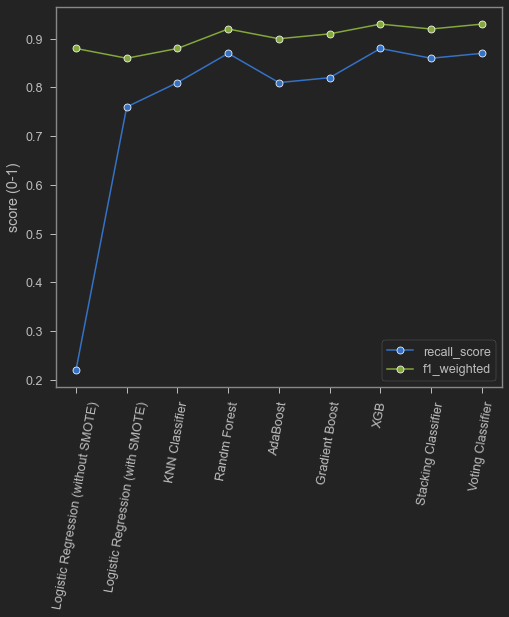

In [15]:
sns.lineplot(x=results_df.index,y=results_df['recall_score'],marker='o',label='recall_score')
sns.lineplot(x=results_df.index,y=results_df['f1_weighted'],marker='o',label='f1_weighted')
plt.ylabel('score (0-1)')
plt.xticks(rotation=80);

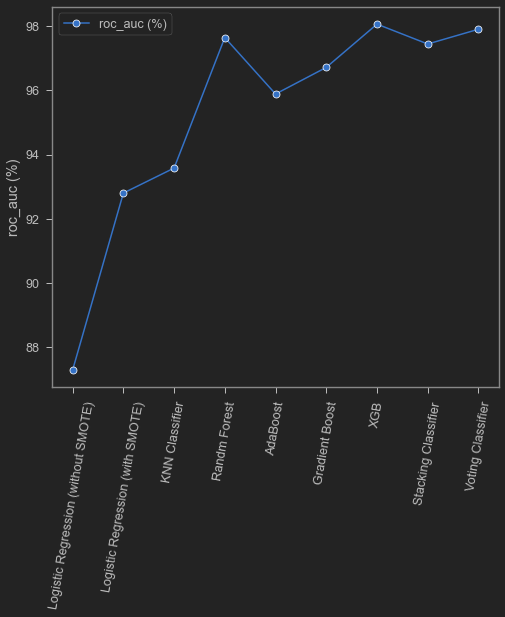

In [14]:
sns.lineplot(x=results_df.index,y=results_df['roc_auc (%)'],marker='o',label='roc_auc (%)')
plt.xticks(rotation=80);

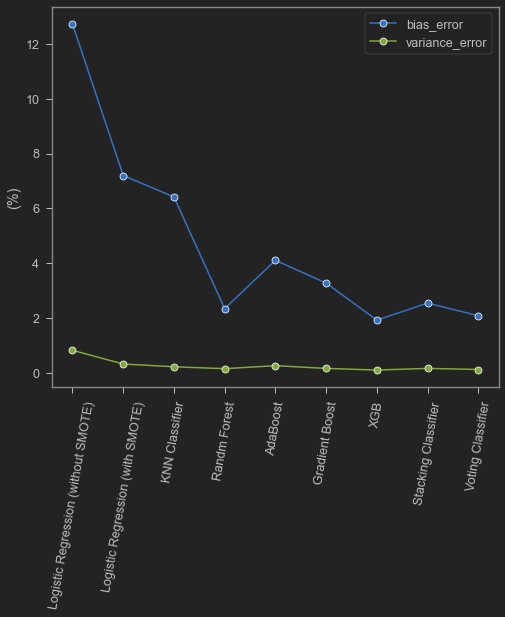

In [13]:
sns.lineplot(x=results_df.index,y=results_df['bias_error %(roc_auc)'],marker='o',label='bias_error')
sns.lineplot(x=results_df.index,y=results_df['variance_error %(roc_auc)'],marker='o',label='variance_error')
plt.ylabel('(%)')
plt.xticks(rotation=80);

# Feature Importance:

In [12]:
features_df = pd.DataFrame()
features_df['Importance'] = xgb.feature_importances_
features_df.index = x_sm.columns

features_df = features_df.sort_values('Importance',ascending=False)

In [13]:
features_df

Importance
housing      0.260568
pdays        0.215173
loan         0.091399
eligible     0.088875
previous     0.056874
campaign     0.044604
duration     0.043998
contact      0.031698
month        0.028142
targeted     0.025629
age group    0.021936
marital      0.019317
day          0.015114
education    0.014506
balance      0.010980
job          0.010689
salary       0.010309
default      0.010190

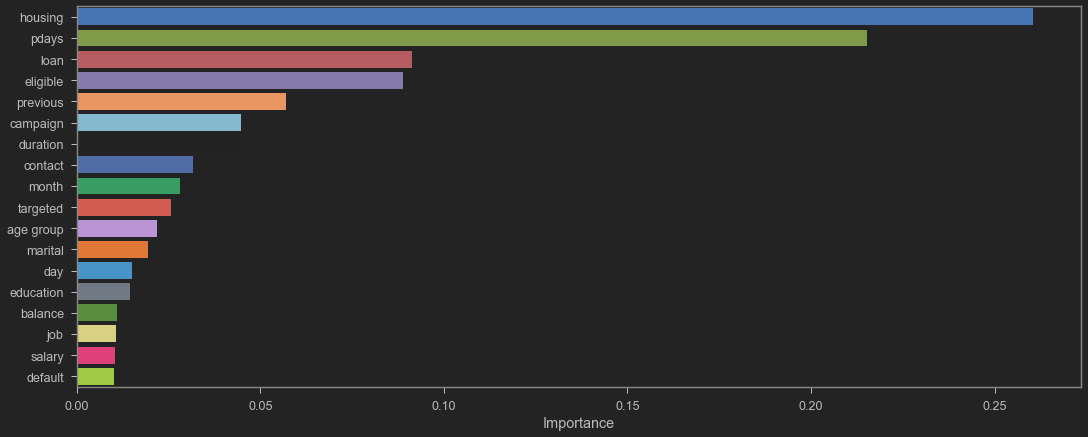

In [16]:
plt.figure(figsize=(18,7))
sns.barplot(x=features_df['Importance'],y=features_df.index);

# Done !!! (Refer Report and PPT for Overall Inference)